# 1 Finding R2 of top model

In [32]:
#Individual Model Performance:
import pandas as pd
# Load the datasets
individual_metrics = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/30SCN/14ML_30SCN_27.csv")
ensemble_metrics = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/ensemble_evaluation_metrics_withActualSeed.csv")

# Display the first few rows of each dataset for an overview
#individual_metrics.head(), ensemble_metrics.head()
individual_metrics, ensemble_metrics

(            Unnamed: 0       MAE        MSE      RMSE        R2
 0             CatBoost  1.456049   2.974496  1.724673  0.709403
 1        Decision Tree  1.966667   6.912222  2.629111  0.324701
 2           ElasticNet  3.188586  12.620884  3.552588 -0.233014
 3    Gradient Boosting  1.293258   3.120317  1.766442  0.695157
 4                Huber  1.640300   4.910485  2.215961  0.520264
 5                  KNN  3.222222  12.399289  3.521262 -0.211365
 6     Lasso Regression  3.230908  12.933151  3.596269 -0.263521
 7    Linear Regression  1.878965   5.605133  2.367516  0.452399
 8         M-estimators  3.049258  12.100498  3.478577 -0.182174
 9   Passive Aggressive  3.614573  16.376772  4.046822 -0.599950
 10       Random Forest  1.508889   3.925074  1.981180  0.616535
 11    Ridge Regression  2.098621   6.225842  2.495164  0.391758
 12                 SVR  3.206173  12.458930  3.529721 -0.217191
 13             XGBoost  1.000599   1.581558  1.257600  0.845488,
   Metric  Simple Voting

In [33]:
# Given R^2 scores for the top models
r2_xgboost = 0.845488
r2_gradient_boosting = 0.695157
r2_catboost = 0.709403

# Calculate the dynamic weights based on R^2 scores
total_r2 = r2_xgboost + r2_gradient_boosting + r2_catboost

w_xgboost_dynamic = r2_xgboost / total_r2
w_gradient_boosting_dynamic = r2_gradient_boosting / total_r2
w_catboost_dynamic = r2_catboost / total_r2

w_xgboost_dynamic, w_gradient_boosting_dynamic, w_catboost_dynamic


(0.3757644281366442, 0.308952075689052, 0.31528349617430385)


**Individual Model Performance**:
1. **Best Performing Models**: 
   - **XGBoost** with \( R^2 = 0.845488 \)
   - **Gradient Boosting** with \( R^2 = 0.695157 \)
   - **CatBoost** with \( R^2 = 0.709403 \)
2. **Worst Performing Models** (significantly lower than others): 
   - **Passive Aggressive** with \( R^2 = -0.599950 \)
   - **ElasticNet** with \( R^2 = -0.233014 \)
   - **KNN** with \( R^2 = -0.211365 \)
   - **Lasso Regression** with \( R^2 = -0.263521 \)
   - **M-estimators** with \( R^2 = -0.182174 \)
   - **SVR** with \( R^2 = -0.217191 \)

**Ensemble Model Performance**:
- The ensemble (both simple and weighted voting) has an \( R^2 \) of \( 0.408183 \), which is significantly lower than the best individual models but better than the worst ones.

**Recommendations**:

1. **Model Selection**: Exclude models with a significantly lower \( R^2 \) from the ensemble. These models might be dragging down the ensemble's overall performance.
2. **Dynamic Weighting**: Instead of equal weighting, use the \( R^2 \) values (or other performance metrics) to assign weights dynamically. Models with higher \( R^2 \) values should get more weight.
3. **Stacking**: Consider using stacking as an ensemble method. Use the predictions of individual models as inputs to a meta-model. This can sometimes outperform simple or weighted voting.
4. **Cross-Validation**: Ensure that the performance metrics are averaged over multiple train-test splits to get a more robust measure of the models' and ensemble's performance.
5. **Hyperparameter Tuning**: Continuously tune the hyperparameters of individual models to get the best performance out of each.

For the current ensemble with weighted voting, based on the \( R^2 \) scores you provided, we can try recalculating weights:

\[
w_{\text{XGBoost}} = \frac{R^2_{\text{XGBoost}}}{R^2_{\text{XGBoost}} + R^2_{\text{Gradient Boosting}} + R^2_{\text{CatBoost}}}
\]
\[
w_{\text{Gradient Boosting}} = \frac{R^2_{\text{Gradient Boosting}}}{R^2_{\text{XGBoost}} + R^2_{\text{Gradient Boosting}} + R^2_{\text{CatBoost}}}
\]
\[
w_{\text{CatBoost}} = \frac{R^2_{\text{CatBoost}}}{R^2_{\text{XGBoost}} + R^2_{\text{Gradient Boosting}} + R^2_{\text{CatBoost}}}
\]

Let's calculate these weights using the provided \( R^2 \) scores.

The recalculated dynamic weights based on the \( R^2 \) scores are:

- **XGBoost**: \( w_{\text{XGBoost}} \) = 0.3758
- **Gradient Boosting**: \( w_{\text{Gradient Boosting}} \) = 0.3089
- **CatBoost**: \( w_{\text{CatBoost}} \) = 0.3153

These weights give more emphasis to the XGBoost model, which has the highest \( R^2 \) score, followed by CatBoost and Gradient Boosting.

You can use these dynamic weights for the weighted voting ensemble method and check if there's an improvement in the ensemble's \( R^2 \) score. Remember, the goal of these weights is to leverage the strengths of each model based on their individual performance.


# 2 Test Voting with Weigth

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Dynamic Weights
w_xgboost = 0.3758
w_gradient_boosting = 0.3089
w_catboost = 0.3153

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data[['Cire_CV','P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']]
y = data['Seed']  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Train and Test the Models
predictions = {"index": X_test.index.tolist()}

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds.tolist()

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions).set_index("index")

# Simple Voting
predictions_df['simple_voting'] = predictions_df.mean(axis=1)

# Weighted Voting using Dynamic Weights
predictions_df['weighted_voting'] = (predictions_df['XGBoost'] * w_xgboost +
                                    predictions_df['Gradient Boosting'] * w_gradient_boosting +
                                    predictions_df['CatBoost'] * w_catboost)

# Save the results to CSV
predictions_df[['simple_voting', 'weighted_voting']].to_csv('C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/ensemble_predictions_W1.csv', index=True)
predictions_df.to_csv('C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/all_predictions_W1.csv', index=True)


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


######################################

# 3 Merge file all_predictions with Actual Data

In [38]:
import pandas as pd
# Load both datasets
predictions_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/all_predictions_W1.csv")
actual_values_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Merge the actual 'Seed' values into the predictions data based on the 'index'
merged_data = pd.merge(predictions_data, actual_values_data[['Seed']], left_on='index', right_index=True, how='left')

# Save the merged data to a new CSV file
merged_filepath = "C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/merged_predictions_with_actual_W1.csv"
merged_data.to_csv(merged_filepath, index=False)

merged_filepath, merged_data.head()


('C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/merged_predictions_with_actual_W1.csv',
    index  CatBoost  Decision Tree  ElasticNet  Gradient Boosting     Huber  \
 0     39  4.992204            5.1    8.578658           4.811172  5.460492   
 1     25  7.305555            3.6    7.576701           5.783953  5.666950   
 2     26  4.222196            3.4    7.523268           3.449652  5.264873   
 3     43  4.698768            2.2    7.785723           3.959662  4.494341   
 4     35  5.449995            4.4    7.553765           4.406406  5.672641   
 
     KNN  Lasso Regression  Linear Regression  M-estimators  \
 0  7.52          8.520260           5.481785      7.851026   
 1  5.42          7.601620           5.212606      4.794666   
 2  5.42          7.555577           4.848376      4.104644   
 3  8.22          7.868758           5.595800      8.653974   
 4  7.62          7.644478           5.681531      7.104979   
 
    Passive Aggressive  R

# 4 Evaluation:
We'll calculate the MAE, MSE, RMSE, and R2
  for both the simple_voting and weighted_voting predictions against the actual target values.

Save to CSV:
We'll save the computed metrics in a CSV file.

Visualization:
We'll create a bar chart comparing the evaluation metrics for both ensemble methods.

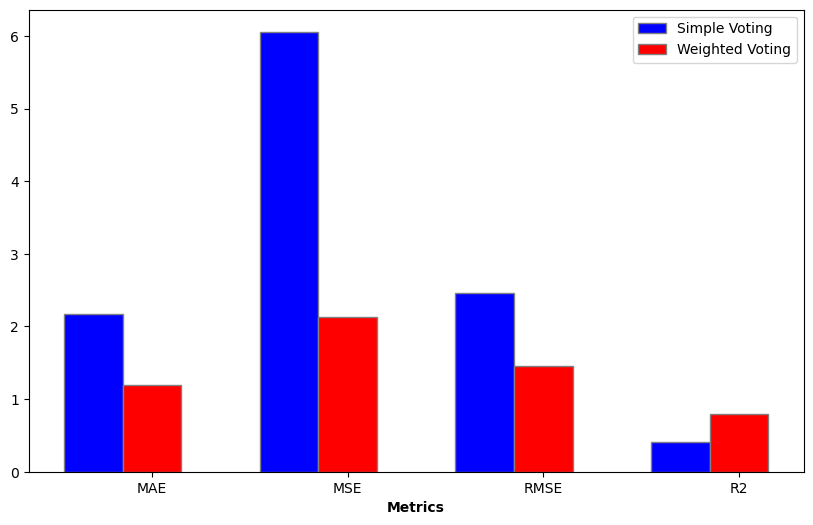

In [39]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the predictions CSV
##########
#W0
# w_xgboost = 0.5  # weight for XGBoost
# w_gradient_boosting = 0.3  # weight for Gradient Boosting
# w_catboost = 0.2  # weight for CatBoost

# data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/merged_predictions_with_actual.csv")
###########################
# #W1 XGBoost = 0.3758
#     Gradient Boosting =0.3089
#     CatBoost = 0.3153
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/merged_predictions_with_actual_W1.csv")

#################################################################################################################################
actual_values = data['Seed']
simple_voting_predictions = data['simple_voting']
weighted_voting_predictions = data['weighted_voting']

# Calculate metrics
metrics = {
    "MAE": mean_absolute_error,
    "MSE": mean_squared_error,
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "R2": r2_score
}

results = {
    "Metric": [],
    "Simple Voting": [],
    "Weighted Voting": []
}

for name, func in metrics.items():
    results["Metric"].append(name)
    results["Simple Voting"].append(func(actual_values, simple_voting_predictions))
    results["Weighted Voting"].append(func(actual_values, weighted_voting_predictions))

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/ensemble_evaluation_metrics_withActualSeed_W1.csv", index=False)

# Visualization
barWidth = 0.3
r1 = np.arange(len(results["Metric"]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, results["Simple Voting"], color='blue', width=barWidth, edgecolor='grey', label='Simple Voting')
plt.bar(r2, results["Weighted Voting"], color='red', width=barWidth, edgecolor='grey', label='Weighted Voting')

plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(results["Metric"]))], results["Metric"])
plt.legend()
plt.show()

Train and Test the Models:
You have 14 machine learning models defined in the models list. You'll need to train each of these models using your training dataset. After training, you can test these models on your test dataset (using the columns ['Cire_CV','P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'] as input features) to get predictions.

Simple Voting and Weighted Voting:

For Simple Voting, you'll average the predictions from all 14 models for each data point.
For Weighted Voting, you'll take a weighted average of the predictions. The weights can be determined based on model performance on a validation set or any other criteria.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv")

# Data Preprocessing: Dropping unnecessary columns and handling missing values
columns_to_drop = ['id', 'Plot_Name']
data = data.drop(columns=columns_to_drop)
data = data.dropna()  # Handle missing values

X = data[['Cire_CV','P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']]
y = data['Seed']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Definition 
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))

]

# Initialize the predictions dictionary with the test indices
predictions = {"index": X_test.index.tolist()}

# # Train and Test the Models and populate the predictions dictionary

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Diagnostic print statement
    print(f"Predictions from {name}: {len(preds)}")
    
    predictions[name] = preds.tolist()

# Convert predictions dictionary to DataFrame using the "index" as the index for the DataFrame
predictions_df = pd.DataFrame(predictions).set_index("index")

# Simple Voting
predictions_df['simple_voting'] = predictions_df.mean(axis=1)

# Weighted Voting (for this demonstration, we'll assign equal weights)
weights = [1/14]*14  # Equal weights for all 14 models
# predictions_df['weighted_voting'] = predictions_df.mul(weights, axis=1).sum(axis=1)
# Exclude the 'simple_voting' column when calculating the weighted voting
predictions_df['weighted_voting'] = predictions_df.drop(columns=['simple_voting']).mul(weights, axis=1).sum(axis=1)
predictions_df[['simple_voting', 'weighted_voting']].head()  # Display the first few rows as a sample

predictions_df[['simple_voting', 'weighted_voting']].to_csv('C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/ensemble_predictions.csv', index=True)

predictions_df.to_csv('C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/all_predictions.csv', index=True)



Predictions from CatBoost: 9
Predictions from Decision Tree: 9
Predictions from ElasticNet: 9
Predictions from Gradient Boosting: 9
Predictions from Huber: 9
Predictions from KNN: 9
Predictions from Lasso Regression: 9
Predictions from Linear Regression: 9


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predictions from M-estimators: 9
Predictions from Passive Aggressive: 9
Predictions from Random Forest: 9
Predictions from Ridge Regression: 9
Predictions from SVR: 9
Predictions from XGBoost: 9


In [ ]:
import pandas as pd
import os

# Directory containing the uploaded files
dir_path = "C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/30SCN"

# List of files to process
files = [
###CD_5VI
    "14ML_30SCN_1.csv",
    "14ML_30SCN_2.csv",
    "14ML_30SCN_3.csv",
    "14ML_30SCN_4.csv",
    "14ML_30SCN_5.csv",
###CD_16ENV
    "14ML_30SCN_6.csv",
    "14ML_30SCN_7.csv",
    "14ML_30SCN_8.csv",
    "14ML_30SCN_9.csv",
    "14ML_30SCN_10.csv",
###CD_6FE
    "14ML_30SCN_11.csv",
    "14ML_30SCN_12.csv",
    "14ML_30SCN_13.csv",
    "14ML_30SCN_14.csv",
    "14ML_30SCN_15.csv",
###CV_5VI
    "14ML_30SCN_16.csv",
    "14ML_30SCN_17.csv",
    "14ML_30SCN_18.csv",
    "14ML_30SCN_19.csv",
    "14ML_30SCN_20.csv",
###CV_16Env
    "14ML_30SCN_26.csv",
    "14ML_30SCN_27.csv",
    "14ML_30SCN_28.csv",
    "14ML_30SCN_29.csv",
    "14ML_30SCN_30.csv",
###CV_6FE
    "14ML_30SCN_26.csv",
    "14ML_30SCN_27.csv",
    "14ML_30SCN_28.csv",
    "14ML_30SCN_29.csv",
    "14ML_30SCN_30.csv"
]

# Placeholder weights for Weighted Voting
# R2= 0.408183
# w_xgboost = 0.5
# w_gradient_boosting = 0.3
# w_catboost = 0.2


w_xgboost = 0.3758
w_gradient_boosting = 0.3089
w_catboost = 0.3153

for file in files:
    # Load the data
    data = pd.read_csv(os.path.join(dir_path, file))
    
    # Simple Voting
    data['simple_voting_pred'] = (data['xgboost_pred'] + data['gradient_boosting_pred'] + data['catboost_pred']) / 3
    
    # Weighted Voting
    data['weighted_voting_pred'] = (w_xgboost * data['xgboost_pred'] +
                                    w_gradient_boosting * data['gradient_boosting_pred'] +
                                    w_catboost * data['catboost_pred'])
    
    # Save the results back to the original file (or to a new file if preferred)
    data.to_csv(os.path.join(dir_path, file), index=False)

print("Ensemble predictions saved for all files.")


# All_SCN


Scenario 1:
                         MAE        MSE      RMSE        R2
CatBoost            2.439596   8.494637  2.914556  0.170105
Decision Tree       2.666667  10.460000  3.234192 -0.021903
ElasticNet          2.804242   9.869870  3.141635  0.035750
Gradient Boosting   2.581553   9.212058  3.035137  0.100016
Huber               2.274710   7.019758  2.649483  0.314196
KNN                 2.191111   6.759467  2.599897  0.339625
Lasso Regression    2.757205   9.472939  3.077814  0.074529
Linear Regression   2.286074   7.035485  2.652449  0.312659
M-estimators        2.230333   6.830125  2.613451  0.332722
Passive Aggressive  2.616131  10.116057  3.180575  0.011699
Random Forest       2.456222   8.528349  2.920334  0.166812
Ridge Regression    2.335533   7.159956  2.675809  0.300499
SVR                 2.456608   7.854693  2.802623  0.232626
XGBoost             2.665771  10.447860  3.232315 -0.020717

--------------------------------------------------

Scenario 2:
                       

c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.998338   5.912643  2.431593  0.422357
Decision Tree       1.777778   4.757778  2.181233  0.535183
ElasticNet          2.714515   9.135805  3.022549  0.107466
Gradient Boosting   1.517242   3.437193  1.853967  0.664199
Huber               2.978856  14.076573  3.751876 -0.375229
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.687366   8.982162  2.997026  0.122476
Linear Regression   3.060139  12.768753  3.573339 -0.247460
M-estimators        3.484984  17.336275  4.163685 -0.693690
Passive Aggressive  2.799930   9.955178  3.155183  0.027416
Random Forest       1.708667   4.567626  2.137201  0.553760
Ridge Regression    2.637399  10.255203  3.202375 -0.001895
SVR                 3.069772  11.845748  3.441765 -0.157286
XGBoost             1.667256   4.213549  2.052693  0.588352

--------------------------------------------------

Scenario 7:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.862801   5.047223  2.246602  0.506905
Decision Tree       1.566667   4.147778  2.036609  0.594777
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.476823   2.978209  1.725749  0.709040
Huber               4.974296  29.438347  5.425712 -1.876018
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.820072  11.020669  3.319739 -0.076679
M-estimators        3.103981  12.685531  3.561675 -0.239329
Passive Aggressive  2.811209  10.025756  3.166347  0.020521
Random Forest       1.765444   4.580434  2.140195  0.552509
Ridge Regression    3.193066  12.715880  3.565933 -0.242294
SVR                 3.070635  11.852321  3.442720 -0.157928
XGBoost             1.483843   3.152300  1.775472  0.692032

--------------------------------------------------

Scenario 8:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.111250   6.615056  2.571975  0.353733
Decision Tree       1.644444   4.384444  2.093907  0.571656
ElasticNet          3.057076  11.625207  3.409576 -0.135740
Gradient Boosting   1.612402   3.854952  1.963403  0.623385
Huber               4.231290  23.841947  4.882822 -1.329270
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.380451  17.454886  4.177904 -0.705278
M-estimators        3.578270  18.921517  4.349887 -0.848562
Passive Aggressive  2.810407  10.021979  3.165751  0.020890
Random Forest       1.950111   5.601272  2.366701  0.452776
Ridge Regression    3.106405  14.164557  3.763583 -0.383825
SVR                 3.070508  11.851315  3.442574 -0.157830
XGBoost             1.921875   5.568648  2.359798  0.455964

--------------------------------------------------

Scenario 9:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.913394   5.307992  2.303908  0.481429
Decision Tree       1.588889   3.754444  1.937639  0.633205
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.442157   3.419423  1.849168  0.665935
Huber               4.439211  21.490000  4.635731 -1.099493
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.839750  11.418733  3.379162 -0.115568
M-estimators        3.276993  12.505088  3.536253 -0.221701
Passive Aggressive  2.812154  10.031457  3.167248  0.019964
Random Forest       1.690444   4.589034  2.142203  0.551668
Ridge Regression    3.685720  15.891653  3.986434 -0.552556
SVR                 3.070960  11.854321  3.443010 -0.158123
XGBoost             1.756983   4.104469  2.025949  0.599009

--------------------------------------------------

Scenario 10:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.149688   7.056221  2.656355  0.310633
Decision Tree       1.633333   3.543333  1.882374  0.653829
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.727015   4.293315  2.072032  0.580559
Huber               4.657861  24.474631  4.947184 -1.391081
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.420751  18.870708  4.344043 -0.843598
M-estimators        2.940074  14.247394  3.774572 -0.391918
Passive Aggressive  2.811987  10.030527  3.167101  0.020055
Random Forest       1.925333   5.630284  2.372822  0.449942
Ridge Regression    3.575148  15.724433  3.965404 -0.536219
SVR                 3.070671  11.852568  3.442756 -0.157952
XGBoost             1.524332   3.662086  1.913658  0.642228

--------------------------------------------------

Scenario 11:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.994580   5.414256  2.326855  0.471047
Decision Tree       2.522222   8.130000  2.851315  0.205729
ElasticNet          2.875558  10.214981  3.196088  0.002034
Gradient Boosting   1.423834   2.557581  1.599244  0.750134
Huber               1.927770   6.179106  2.485781  0.396324
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    2.842095  10.021338  3.165650  0.020952
Linear Regression   1.892391   5.971647  2.443695  0.416592
M-estimators        2.854844  12.233461  3.497636 -0.195164
Passive Aggressive  3.562778  16.020964  4.002620 -0.565189
Random Forest       1.730000   3.746199  1.935510  0.634010
Ridge Regression    1.833058   5.645257  2.375975  0.448479
SVR                 3.206040  12.429304  3.525522 -0.214297
XGBoost             1.412992   2.577768  1.605543  0.748162

--------------------------------------------------

Scenario 12:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.609508   3.496409  1.869869  0.658414
Decision Tree       2.088889   5.895556  2.428077  0.424026
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.283223   2.208410  1.486072  0.784247
Huber               1.510034   3.928492  1.982042  0.616201
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.699778   4.755914  2.180806  0.535365
M-estimators        1.822852   5.729687  2.393677  0.440231
Passive Aggressive  3.634758  16.642021  4.079463 -0.625864
Random Forest       1.805778   4.249325  2.061389  0.584857
Ridge Regression    2.369640   7.224251  2.687797  0.294217
SVR                 3.206606  12.462918  3.530286 -0.217581
XGBoost             1.150398   1.739973  1.319081  0.830011

--------------------------------------------------

Scenario 13:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.126893   6.277837  2.505561  0.386679
Decision Tree       2.522222   8.130000  2.851315  0.205729
ElasticNet          3.208530  12.768536  3.573309 -0.247439
Gradient Boosting   1.725229   3.965579  1.991376  0.612578
Huber               2.303758   8.690289  2.947930  0.150991
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.269954   8.933295  2.988862  0.127250
M-estimators        2.209680   8.344860  2.888747  0.184738
Passive Aggressive  3.624978  16.562697  4.069729 -0.618114
Random Forest       1.825000   4.374869  2.091619  0.572592
Ridge Regression    2.292732   8.037468  2.835043  0.214769
SVR                 3.207658  12.462777  3.530266 -0.217567
XGBoost             1.593097   3.262944  1.806362  0.681222

--------------------------------------------------

Scenario 14:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.631004   3.765064  1.940377  0.632167
Decision Tree       1.766667   4.832222  2.198232  0.527910
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.397134   2.754680  1.659723  0.730878
Huber               1.642681   4.557992  2.134945  0.554701
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.763477   5.069658  2.251590  0.504713
M-estimators        3.116219  14.527822  3.811538 -0.419314
Passive Aggressive  3.640513  16.689309  4.085255 -0.630484
Random Forest       1.735556   4.119305  2.029607  0.597559
Ridge Regression    2.952264  10.763547  3.280784 -0.051559
SVR                 3.206217  12.463164  3.530321 -0.217605
XGBoost             1.446070   2.642071  1.625445  0.741879

--------------------------------------------------

Scenario 15:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.109077   6.417587  2.533296  0.373026
Decision Tree       1.800000   3.957778  1.989416  0.613340
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.719456   3.591393  1.895097  0.649134
Huber               2.242741   9.040202  3.006693  0.116806
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.367248   9.884487  3.143960  0.034322
M-estimators        3.930387  23.522542  4.850004 -1.298065
Passive Aggressive  3.638002  16.668948  4.082762 -0.628494
Random Forest       1.903889   4.494409  2.120002  0.560913
Ridge Regression    2.762432   9.713845  3.116704  0.050993
SVR                 3.207079  12.466070  3.530732 -0.217889
XGBoost             1.660893   3.541025  1.881761  0.654055

--------------------------------------------------

Scenario 16:
                         MAE      

c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.144616   7.080247  2.660873  0.308286
Decision Tree       2.433333   8.983333  2.997221  0.122362
ElasticNet          2.313443   7.162957  2.676370  0.300206
Gradient Boosting   1.962277   6.999899  2.645732  0.316136
Huber               3.396203  14.530197  3.811850 -0.419546
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.351985   7.367495  2.714313  0.280223
Linear Regression   3.847356  19.994670  4.471540 -0.953405
M-estimators        3.106073  15.712189  3.963860 -0.535023
Passive Aggressive  2.754382   9.544797  3.089465  0.067509
Random Forest       1.872889   5.665161  2.380160  0.446535
Ridge Regression    3.147215  12.350555  3.514336 -0.206603
SVR                 3.068265  11.835508  3.440277 -0.156285
XGBoost             1.743415   3.843121  1.960388  0.624541

--------------------------------------------------

Scenario 22:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.008906   6.031918  2.455996  0.410704
Decision Tree       2.566667   9.578889  3.094978  0.064178
ElasticNet          3.025751  11.406108  3.377293 -0.114334
Gradient Boosting   1.797928   6.408669  2.531535  0.373897
Huber               4.235219  21.307300  4.615983 -1.081644
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.784702  19.295315  4.392643 -0.885081
M-estimators        3.485917  16.081260  4.010145 -0.571080
Passive Aggressive  2.808334   9.998870  3.162099  0.023147
Random Forest       1.729556   4.925128  2.219263  0.518833
Ridge Regression    3.186794  12.795537  3.577085 -0.250077
SVR                 3.070546  11.851721  3.442633 -0.157869
XGBoost             1.568573   3.052408  1.747114  0.701791

--------------------------------------------------

Scenario 23:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.149642   6.738630  2.595887  0.341661
Decision Tree       3.288889  18.140000  4.259108 -0.772211
ElasticNet          2.787817   9.746890  3.122001  0.047765
Gradient Boosting   2.029927   6.596102  2.568288  0.355585
Huber               3.555075  16.891022  4.109869 -0.650190
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.919589  10.567851  3.250823 -0.032440
Linear Regression   4.016911  21.855624  4.675000 -1.135214
M-estimators        4.251365  24.428930  4.942563 -1.386616
Passive Aggressive  2.797515   9.900807  3.146555  0.032728
Random Forest       1.977000   6.050621  2.459801  0.408877
Ridge Regression    3.281555  13.526197  3.677798 -0.321459
SVR                 3.070052  11.848260  3.442130 -0.157531
XGBoost             1.525060   4.200915  2.049613  0.589586

--------------------------------------------------

Scenario 24:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.079389   6.610746  2.571137  0.354155
Decision Tree       2.477778   9.247778  3.041016  0.096526
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.875646   6.426631  2.535080  0.372142
Huber               4.384550  22.151082  4.706494 -1.164079
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.831894  19.910277  4.462093 -0.945160
M-estimators        5.542538  53.460772  7.311687 -4.222920
Passive Aggressive  2.811764  10.027752  3.166663  0.020326
Random Forest       1.892111   5.711002  2.389770  0.442056
Ridge Regression    3.547762  15.152602  3.892634 -0.480353
SVR                 3.070947  11.854234  3.442998 -0.158115
XGBoost             1.993076   4.796881  2.190178  0.531362

--------------------------------------------------

Scenario 25:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.142968   6.995920  2.644980  0.316525
Decision Tree       3.377778  18.080000  4.252058 -0.766349
ElasticNet          3.070322  11.748944  3.427673 -0.147828
Gradient Boosting   2.391092   8.665700  2.943756  0.153393
Huber               4.438287  23.822027  4.880781 -1.327324
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   4.047663  22.195244  4.711183 -1.168393
M-estimators        4.357265  25.233142  5.023260 -1.465185
Passive Aggressive  2.809031  10.001864  3.162572  0.022855
Random Forest       2.063222   6.534886  2.556342  0.361566
Ridge Regression    3.361089  14.291779  3.780447 -0.396254
SVR                 3.070566  11.851867  3.442654 -0.157884
XGBoost             1.509948   4.891764  2.211733  0.522093

--------------------------------------------------

Scenario 26:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.560225   3.568052  1.888929  0.651415
Decision Tree       2.255556   8.494444  2.914523  0.170124
ElasticNet          2.526106   8.207154  2.864813  0.198191
Gradient Boosting   1.648735   4.607272  2.146456  0.549887
Huber               1.694989   5.141131  2.267406  0.497731
KNN                 3.160000  11.966222  3.459223 -0.169056
Lasso Regression    2.614986   8.700918  2.949732  0.149953
Linear Regression   1.904739   5.804516  2.409256  0.432920
M-estimators        3.365164  14.607903  3.822029 -0.427138
Passive Aggressive  3.300995  12.889526  3.590199 -0.259259
Random Forest       1.549444   4.197551  2.048793  0.589915
Ridge Regression    1.871848   5.567226  2.359497  0.456103
SVR                 3.199087  12.362782  3.516075 -0.207798
XGBoost             1.462407   2.856626  1.690156  0.720918

--------------------------------------------------

Scenario 27:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.456049   2.974496  1.724673  0.709403
Decision Tree       1.966667   6.912222  2.629111  0.324701
ElasticNet          3.188586  12.620884  3.552588 -0.233014
Gradient Boosting   1.293258   3.120317  1.766442  0.695157
Huber               1.640300   4.910485  2.215961  0.520264
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.878965   5.605133  2.367516  0.452399
M-estimators        3.049258  12.100498  3.478577 -0.182174
Passive Aggressive  3.614573  16.376772  4.046822 -0.599950
Random Forest       1.508889   3.925074  1.981180  0.616535
Ridge Regression    2.098621   6.225842  2.495164  0.391758
SVR                 3.206173  12.458930  3.529721 -0.217191
XGBoost             1.000599   1.581558  1.257600  0.845488

--------------------------------------------------

Scenario 28:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.750959   4.208235  2.051398  0.588871
Decision Tree       1.777778   6.435556  2.536840  0.371270
ElasticNet          2.964960  10.940564  3.307652 -0.068853
Gradient Boosting   1.460329   3.757086  1.938320  0.632947
Huber               1.776371   5.434183  2.331134  0.469100
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.035170  11.437551  3.381945 -0.117406
Linear Regression   1.960752   6.186628  2.487293  0.395589
M-estimators        4.380679  26.357042  5.133911 -1.574985
Passive Aggressive  3.538578  15.410032  3.925561 -0.505503
Random Forest       1.558000   4.319746  2.078400  0.577977
Ridge Regression    1.989210   6.073707  2.464489  0.406621
SVR                 3.205415  12.442178  3.527347 -0.215555
XGBoost             1.232332   2.229999  1.493318  0.782137

--------------------------------------------------

Scenario 29:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.568324   3.405732  1.845463  0.667273
Decision Tree       2.166667   8.130000  2.851315  0.205729
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.620679   4.450427  2.109603  0.565210
Huber               1.957361   5.640817  2.375040  0.448913
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.886641   5.700531  2.387578  0.443079
M-estimators        3.222278  13.575233  3.684458 -0.326250
Passive Aggressive  3.637854  16.651906  4.080675 -0.626830
Random Forest       1.565000   4.353179  2.086427  0.574711
Ridge Regression    2.710274   9.214642  3.035563  0.099764
SVR                 3.206135  12.462511  3.530228 -0.217541
XGBoost             1.325536   2.388716  1.545547  0.766631

--------------------------------------------------

Scenario 30:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.660477   4.534477  2.129431  0.556998
Decision Tree       1.377778   2.257778  1.502590  0.779423
ElasticNet          3.224486  12.910854  3.593168 -0.261343
Gradient Boosting   1.537894   4.366549  2.089629  0.573404
Huber               1.934437   5.744405  2.396749  0.438793
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.004356   6.383094  2.526479  0.376395
M-estimators        5.194393  36.844138  6.069937 -2.599536
Passive Aggressive  3.617433  16.376082  4.046737 -0.599883
Random Forest       1.597667   4.845673  2.201289  0.526596
Ridge Regression    2.249617   7.019516  2.649437  0.314219
SVR                 3.206484  12.460991  3.530013 -0.217393
XGBoost             1.369652   2.989806  1.729106  0.707907

--------------------------------------------------

VI 1:
                         MAE        MSE  

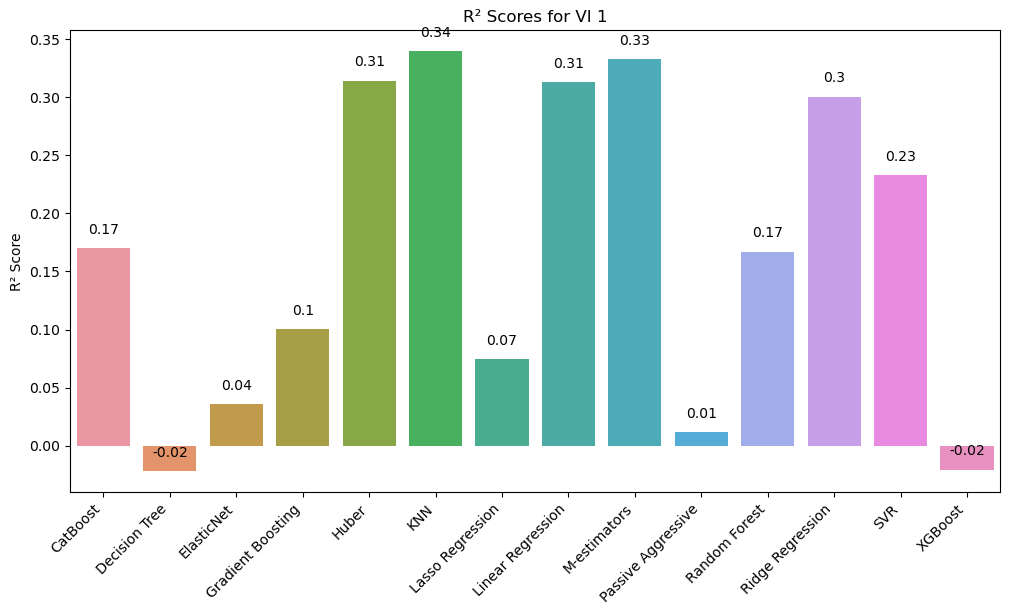


--------------------------------------------------

VI 2:
                         MAE        MSE      RMSE        R2
CatBoost            2.257814   6.162422  2.482423  0.397954
Decision Tree       2.277778   5.805556  2.409472  0.432819
ElasticNet          3.088889  12.073333  3.474670 -0.179520
Gradient Boosting   2.267110   6.009248  2.451377  0.412919
Huber               2.175069   6.150256  2.479971  0.399143
KNN                 2.284444   6.404622  2.530736  0.374292
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.188388   6.198790  2.489737  0.394401
M-estimators        2.153654   5.913861  2.431843  0.422238
Passive Aggressive  2.201871   6.103444  2.470515  0.403716
Random Forest       2.274333   6.411398  2.532074  0.373630
Ridge Regression    2.598719   8.380233  2.894863  0.181282
SVR                 2.329709   6.955994  2.637422  0.320425
XGBoost             2.278540   5.809476  2.410286  0.432436


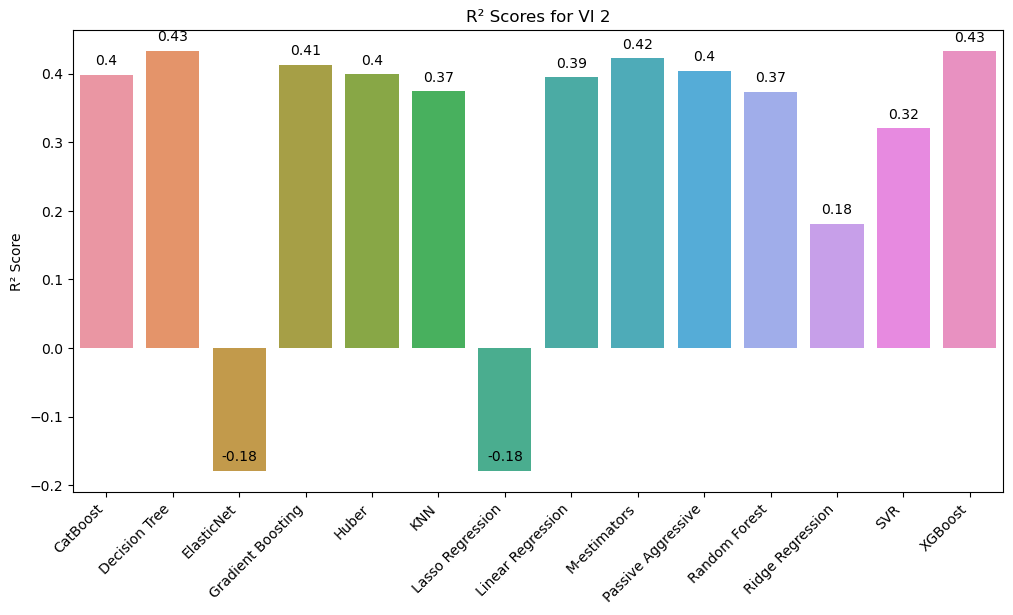


--------------------------------------------------

VI 3:
                         MAE        MSE      RMSE        R2
CatBoost            2.578931  10.192666  3.192596  0.004214
Decision Tree       2.777778  12.131111  3.482974 -0.185165
ElasticNet          3.053587  11.793521  3.434170 -0.152183
Gradient Boosting   2.686486  11.113367  3.333672 -0.085735
Huber               2.324594   8.355626  2.890610  0.183686
KNN                 1.982222   5.862044  2.421166  0.427300
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.340887   8.232432  2.869222  0.195722
M-estimators        2.391923   7.956715  2.820765  0.222658
Passive Aggressive  3.150054  14.286479  3.779746 -0.395736
Random Forest       2.214222   6.761359  2.600261  0.339440
Ridge Regression    2.465982   8.297283  2.880501  0.189386
SVR                 2.449675   8.070193  2.840809  0.211572
XGBoost             2.774962  12.098271  3.478257 -0.181956


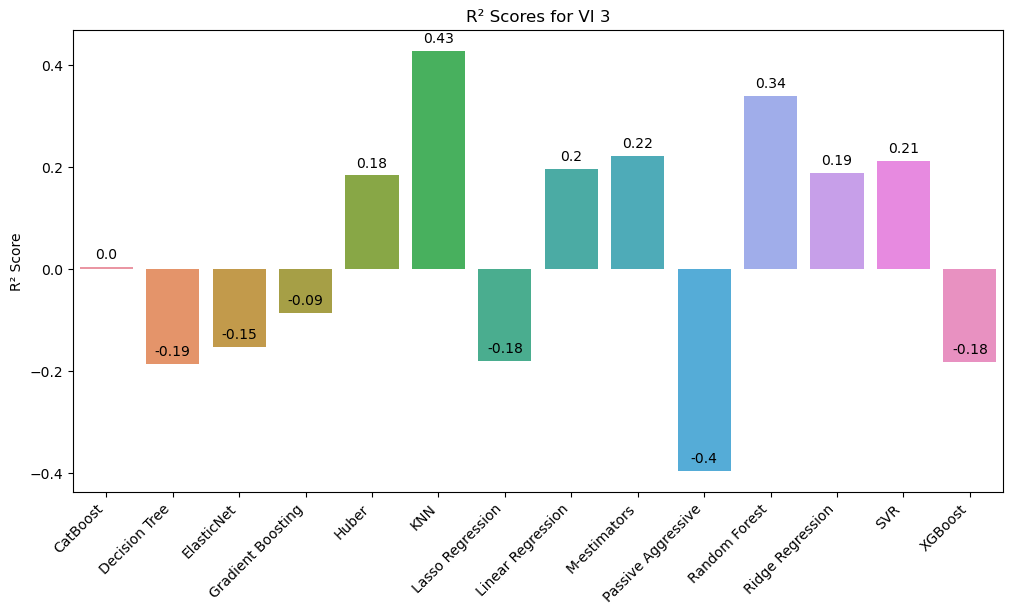


--------------------------------------------------

VI 4:
                         MAE        MSE      RMSE        R2
CatBoost            2.953255   9.656639  3.107513  0.056582
Decision Tree       3.133333  11.011111  3.318299 -0.075745
ElasticNet          3.088889  12.073333  3.474670 -0.179520
Gradient Boosting   2.985155   9.892692  3.145265  0.033521
Huber               2.129220   6.127013  2.475280  0.401414
KNN                 2.415556   7.199067  2.683108  0.296678
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.151600   6.178108  2.485580  0.396422
M-estimators        2.111726   5.840954  2.416806  0.429360
Passive Aggressive  2.833905  10.096276  3.177464  0.013631
Random Forest       2.661222   8.332547  2.886615  0.185941
Ridge Regression    2.987350  11.239226  3.352495 -0.098031
SVR                 2.357307   7.127956  2.669823  0.303625
XGBoost             3.131622  10.998214  3.316355 -0.074485


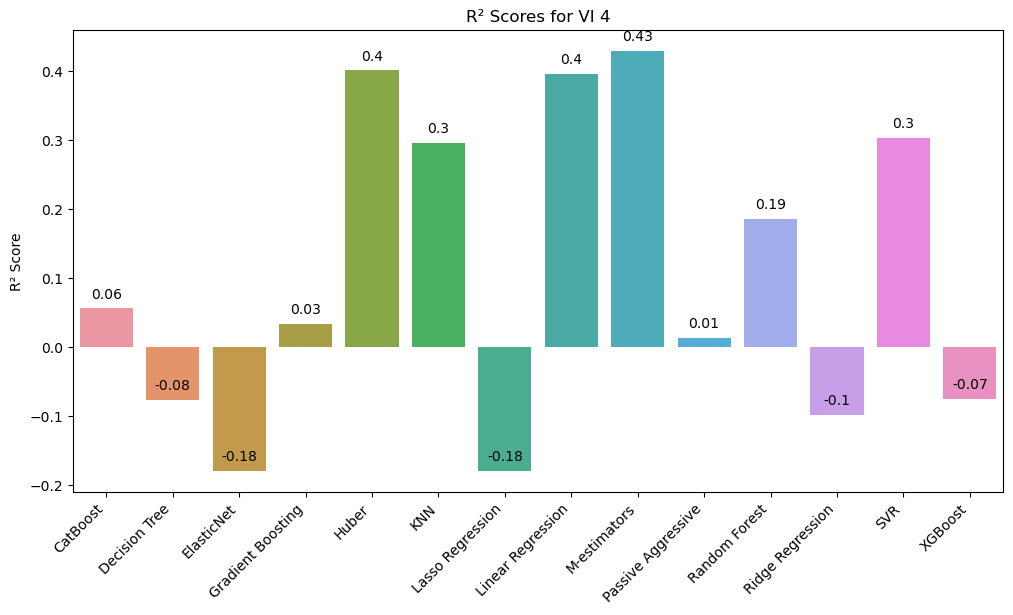


--------------------------------------------------

VI 5:
                         MAE        MSE      RMSE        R2
CatBoost            2.053867   6.294915  2.508967  0.385010
Decision Tree       2.122222   7.510000  2.740438  0.266301
ElasticNet          3.088889  12.073333  3.474670 -0.179520
Gradient Boosting   2.076426   6.830550  2.613532  0.332681
Huber               2.326610   8.539577  2.922255  0.165715
KNN                 1.986667   5.774222  2.402961  0.435880
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.334137   8.472443  2.910746  0.172274
M-estimators        2.375709   8.195080  2.862705  0.199371
Passive Aggressive  2.517901   8.028895  2.833530  0.215607
Random Forest       1.957889   5.254061  2.292174  0.486698
Ridge Regression    2.792849   9.856539  3.139513  0.037053
SVR                 2.503994   8.606426  2.933671  0.159184
XGBoost             2.120941   7.493454  2.737417  0.267917


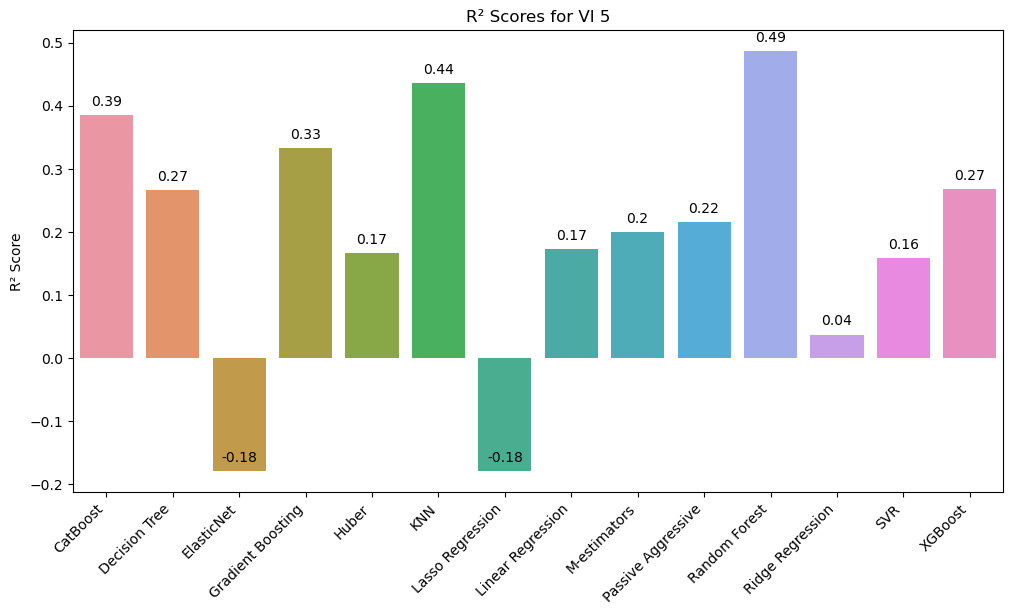


--------------------------------------------------

VI 6:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.998338   5.912643  2.431593  0.422357
Decision Tree       1.777778   4.757778  2.181233  0.535183
ElasticNet          2.714515   9.135805  3.022549  0.107466
Gradient Boosting   1.517242   3.437193  1.853967  0.664199
Huber               2.978856  14.076573  3.751876 -0.375229
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.687366   8.982162  2.997026  0.122476
Linear Regression   3.060139  12.768753  3.573339 -0.247460
M-estimators        3.484984  17.336275  4.163685 -0.693690
Passive Aggressive  2.799930   9.955178  3.155183  0.027416
Random Forest       1.708667   4.567626  2.137201  0.553760
Ridge Regression    2.637399  10.255203  3.202375 -0.001895
SVR                 3.069772  11.845748  3.441765 -0.157286
XGBoost             1.667256   4.213549  2.052693  0.588352


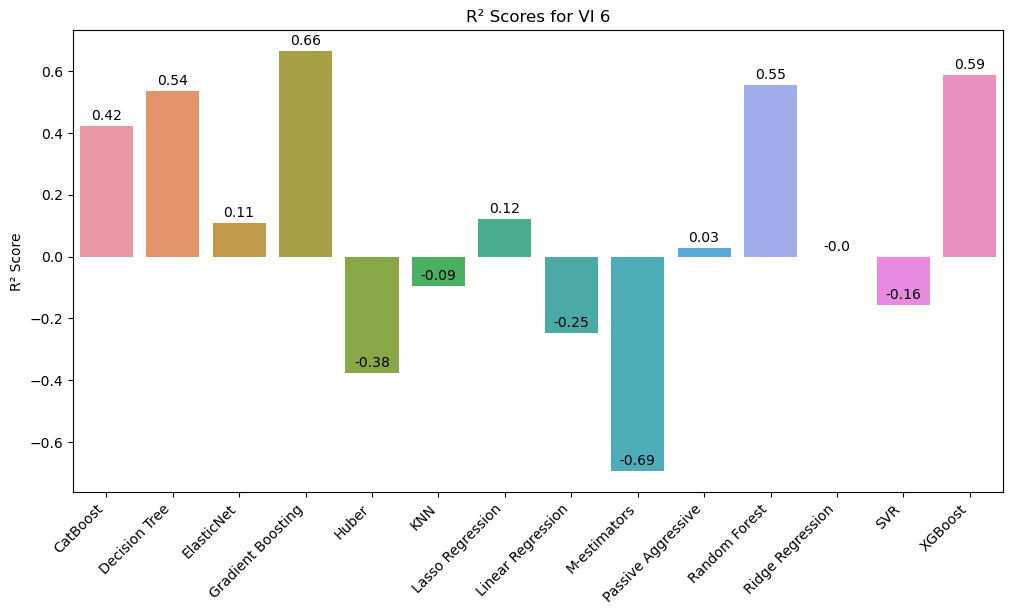


--------------------------------------------------

VI 7:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.862801   5.047223  2.246602  0.506905
Decision Tree       1.566667   4.147778  2.036609  0.594777
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.476823   2.978209  1.725749  0.709040
Huber               4.974296  29.438347  5.425712 -1.876018
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.820072  11.020669  3.319739 -0.076679
M-estimators        3.103981  12.685531  3.561675 -0.239329
Passive Aggressive  2.811209  10.025756  3.166347  0.020521
Random Forest       1.765444   4.580434  2.140195  0.552509
Ridge Regression    3.193066  12.715880  3.565933 -0.242294
SVR                 3.070635  11.852321  3.442720 -0.157928
XGBoost             1.483843   3.152300  1.775472  0.692032


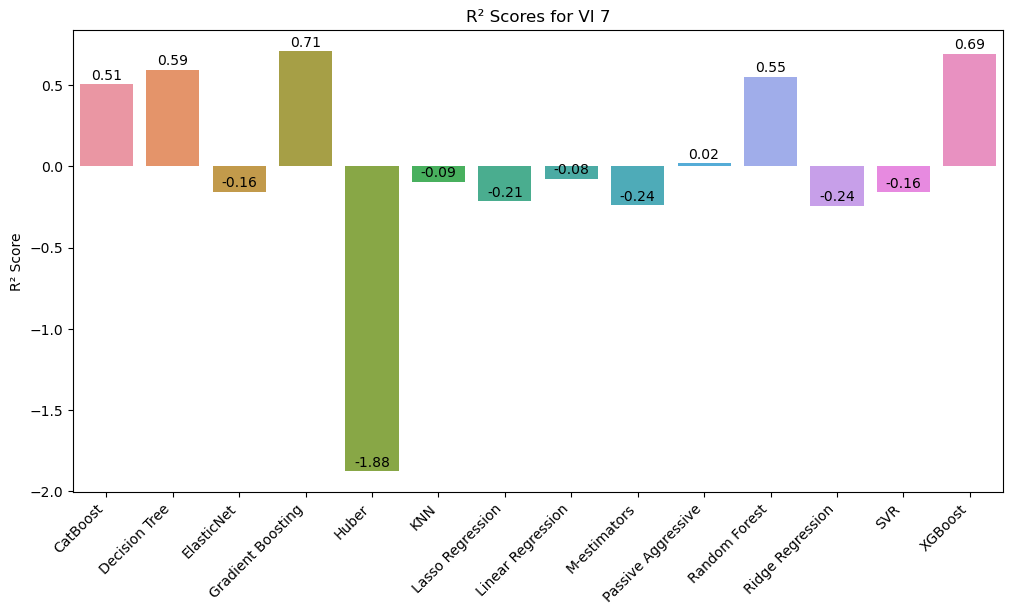


--------------------------------------------------

VI 8:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.111250   6.615056  2.571975  0.353733
Decision Tree       1.644444   4.384444  2.093907  0.571656
ElasticNet          3.057076  11.625207  3.409576 -0.135740
Gradient Boosting   1.612402   3.854952  1.963403  0.623385
Huber               4.231290  23.841947  4.882822 -1.329270
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.380451  17.454886  4.177904 -0.705278
M-estimators        3.578270  18.921517  4.349887 -0.848562
Passive Aggressive  2.810407  10.021979  3.165751  0.020890
Random Forest       1.950111   5.601272  2.366701  0.452776
Ridge Regression    3.106405  14.164557  3.763583 -0.383825
SVR                 3.070508  11.851315  3.442574 -0.157830
XGBoost             1.921875   5.568648  2.359798  0.455964


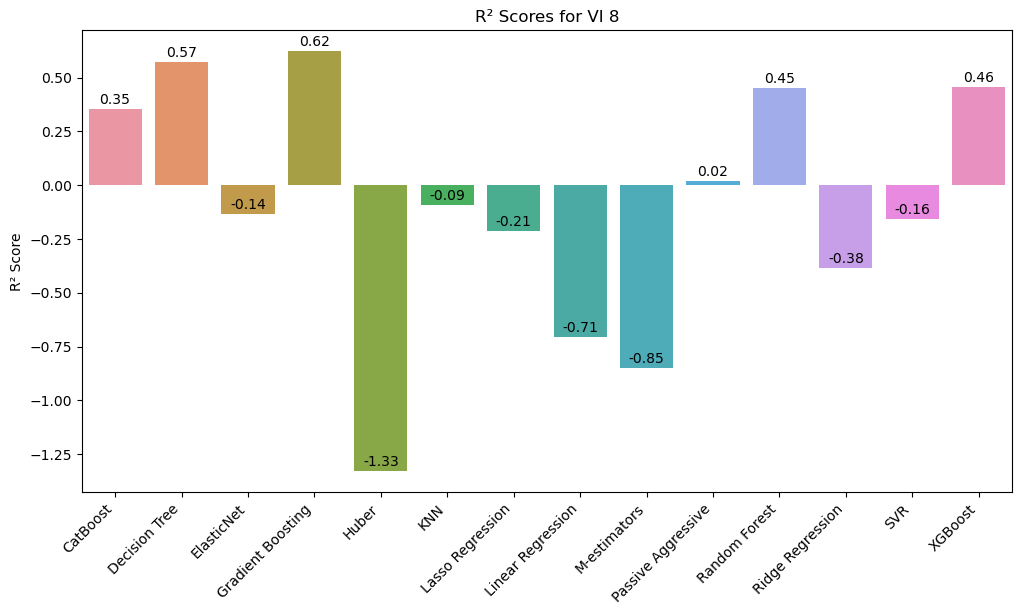


--------------------------------------------------

VI 9:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.913394   5.307992  2.303908  0.481429
Decision Tree       1.588889   3.754444  1.937639  0.633205
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.442157   3.419423  1.849168  0.665935
Huber               4.439211  21.490000  4.635731 -1.099493
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.839750  11.418733  3.379162 -0.115568
M-estimators        3.276993  12.505088  3.536253 -0.221701
Passive Aggressive  2.812154  10.031457  3.167248  0.019964
Random Forest       1.690444   4.589034  2.142203  0.551668
Ridge Regression    3.685720  15.891653  3.986434 -0.552556
SVR                 3.070960  11.854321  3.443010 -0.158123
XGBoost             1.756983   4.104469  2.025949  0.599009


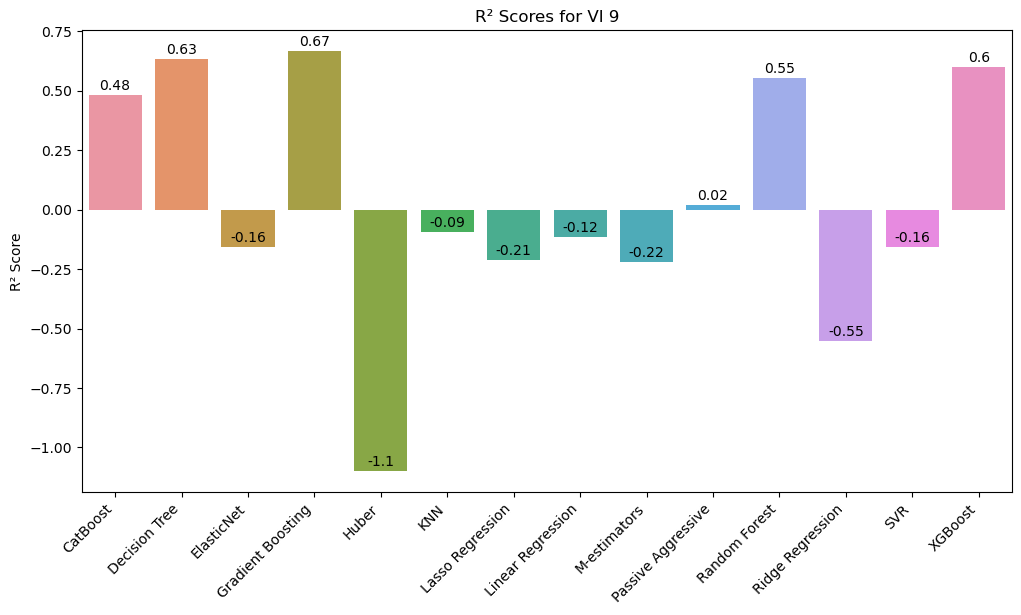


--------------------------------------------------

VI 10:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.149688   7.056221  2.656355  0.310633
Decision Tree       1.633333   3.543333  1.882374  0.653829
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.727015   4.293315  2.072032  0.580559
Huber               4.657861  24.474631  4.947184 -1.391081
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.420751  18.870708  4.344043 -0.843598
M-estimators        2.940074  14.247394  3.774572 -0.391918
Passive Aggressive  2.811987  10.030527  3.167101  0.020055
Random Forest       1.925333   5.630284  2.372822  0.449942
Ridge Regression    3.575148  15.724433  3.965404 -0.536219
SVR                 3.070671  11.852568  3.442756 -0.157952
XGBoost             1.524332   3.662086  1.913658  0.642228


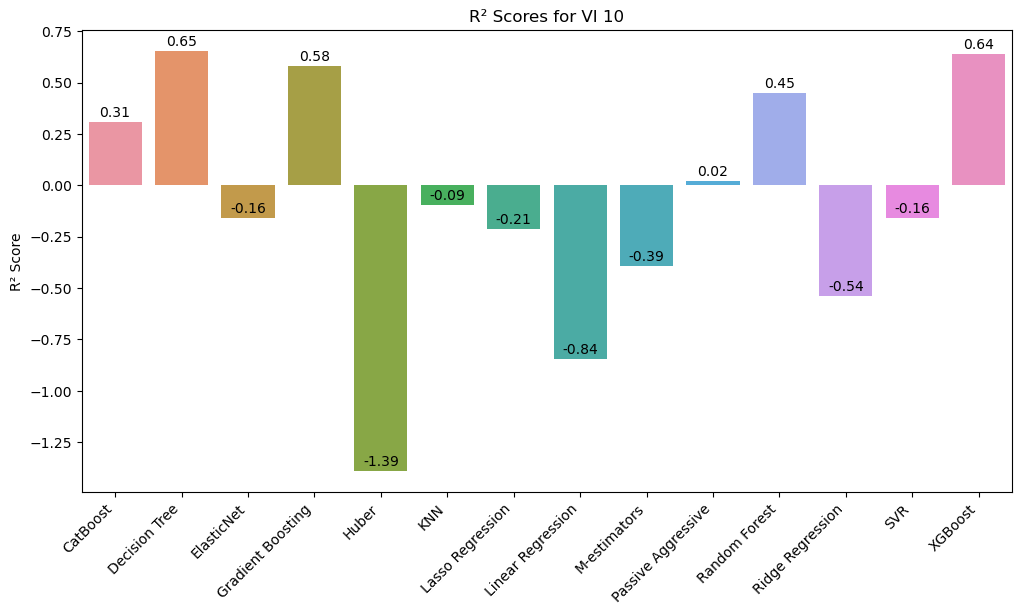


--------------------------------------------------

VI 11:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.994580   5.414256  2.326855  0.471047
Decision Tree       2.522222   8.130000  2.851315  0.205729
ElasticNet          2.875558  10.214981  3.196088  0.002034
Gradient Boosting   1.423834   2.557581  1.599244  0.750134
Huber               1.927770   6.179106  2.485781  0.396324
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    2.842095  10.021338  3.165650  0.020952
Linear Regression   1.892391   5.971647  2.443695  0.416592
M-estimators        2.854844  12.233461  3.497636 -0.195164
Passive Aggressive  3.562778  16.020964  4.002620 -0.565189
Random Forest       1.730000   3.746199  1.935510  0.634010
Ridge Regression    1.833058   5.645257  2.375975  0.448479
SVR                 3.206040  12.429304  3.525522 -0.214297
XGBoost             1.412992   2.577768  1.605543  0.748162


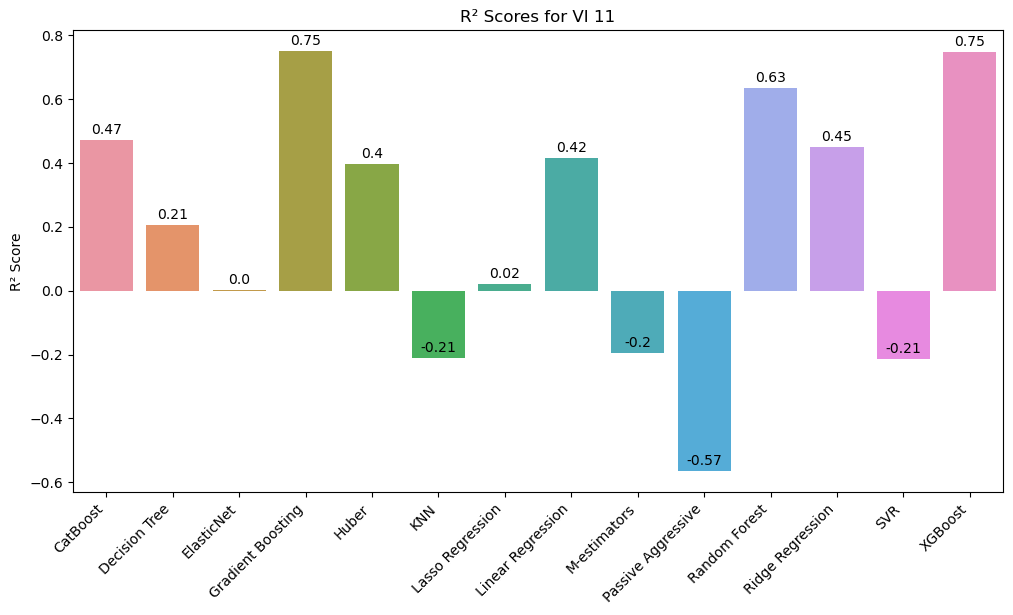


--------------------------------------------------

VI 12:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.609508   3.496409  1.869869  0.658414
Decision Tree       2.088889   5.895556  2.428077  0.424026
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.283223   2.208410  1.486072  0.784247
Huber               1.510034   3.928492  1.982042  0.616201
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.699778   4.755914  2.180806  0.535365
M-estimators        1.822852   5.729687  2.393677  0.440231
Passive Aggressive  3.634758  16.642021  4.079463 -0.625864
Random Forest       1.805778   4.249325  2.061389  0.584857
Ridge Regression    2.369640   7.224251  2.687797  0.294217
SVR                 3.206606  12.462918  3.530286 -0.217581
XGBoost             1.150398   1.739973  1.319081  0.830011


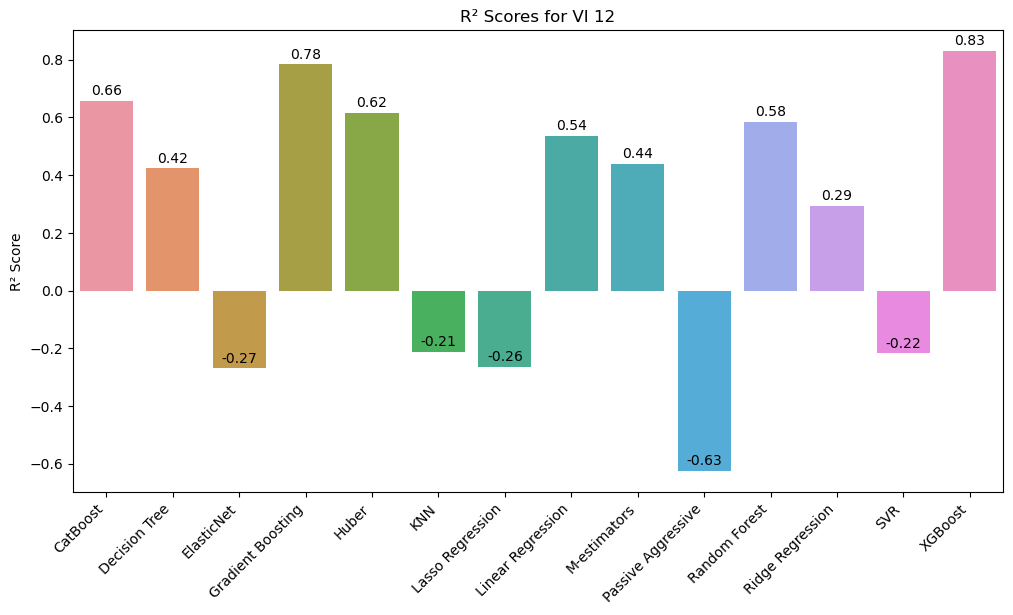


--------------------------------------------------

VI 13:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.126893   6.277837  2.505561  0.386679
Decision Tree       2.522222   8.130000  2.851315  0.205729
ElasticNet          3.208530  12.768536  3.573309 -0.247439
Gradient Boosting   1.725229   3.965579  1.991376  0.612578
Huber               2.303758   8.690289  2.947930  0.150991
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.269954   8.933295  2.988862  0.127250
M-estimators        2.209680   8.344860  2.888747  0.184738
Passive Aggressive  3.624978  16.562697  4.069729 -0.618114
Random Forest       1.825000   4.374869  2.091619  0.572592
Ridge Regression    2.292732   8.037468  2.835043  0.214769
SVR                 3.207658  12.462777  3.530266 -0.217567
XGBoost             1.593097   3.262944  1.806362  0.681222


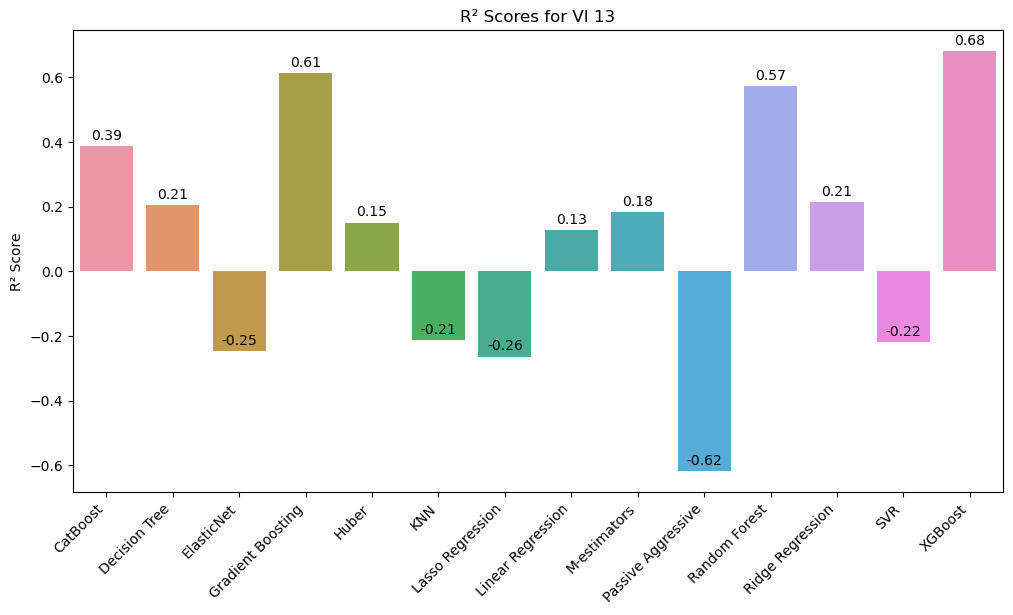


--------------------------------------------------

VI 14:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.631004   3.765064  1.940377  0.632167
Decision Tree       1.766667   4.832222  2.198232  0.527910
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.397134   2.754680  1.659723  0.730878
Huber               1.642681   4.557992  2.134945  0.554701
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.763477   5.069658  2.251590  0.504713
M-estimators        3.116219  14.527822  3.811538 -0.419314
Passive Aggressive  3.640513  16.689309  4.085255 -0.630484
Random Forest       1.735556   4.119305  2.029607  0.597559
Ridge Regression    2.952264  10.763547  3.280784 -0.051559
SVR                 3.206217  12.463164  3.530321 -0.217605
XGBoost             1.446070   2.642071  1.625445  0.741879


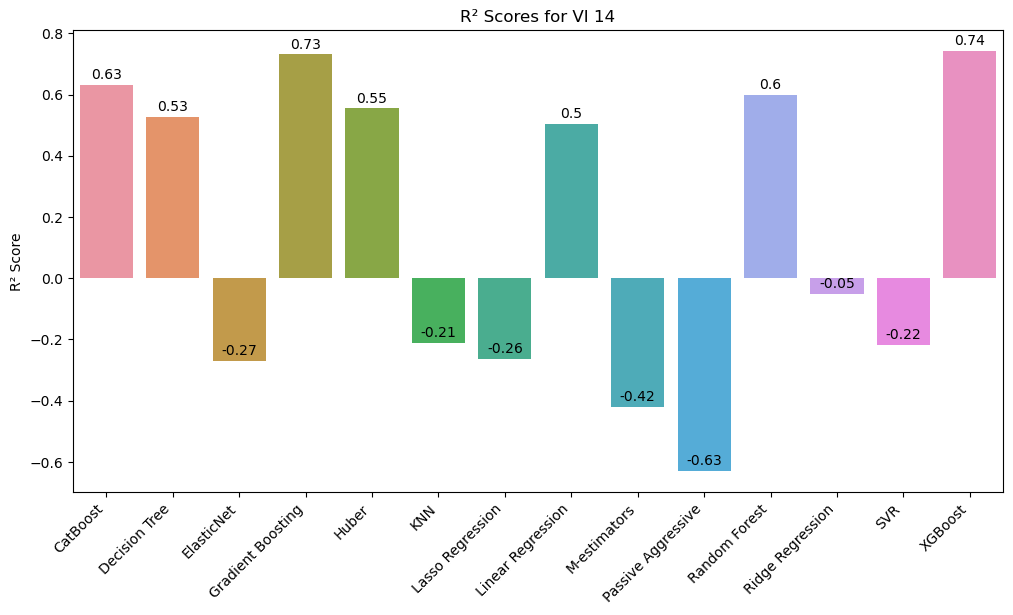


--------------------------------------------------

VI 15:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.109077   6.417587  2.533296  0.373026
Decision Tree       1.800000   3.957778  1.989416  0.613340
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.719456   3.591393  1.895097  0.649134
Huber               2.242741   9.040202  3.006693  0.116806
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.367248   9.884487  3.143960  0.034322
M-estimators        3.930387  23.522542  4.850004 -1.298065
Passive Aggressive  3.638002  16.668948  4.082762 -0.628494
Random Forest       1.903889   4.494409  2.120002  0.560913
Ridge Regression    2.762432   9.713845  3.116704  0.050993
SVR                 3.207079  12.466070  3.530732 -0.217889
XGBoost             1.660893   3.541025  1.881761  0.654055


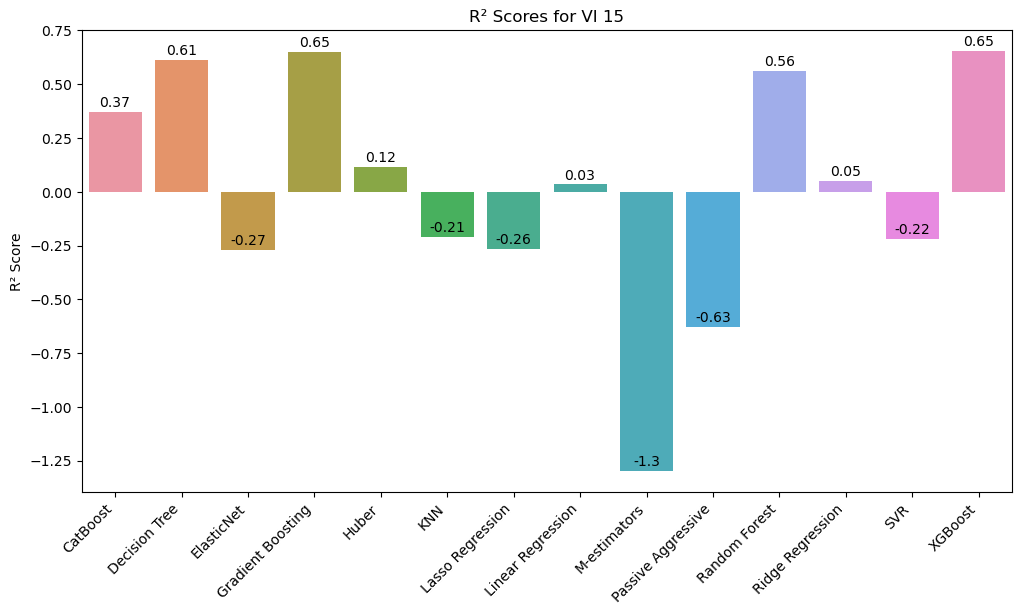


--------------------------------------------------

VI 16:
                         MAE        MSE      RMSE        R2
CatBoost            2.526473   7.278080  2.697792  0.288959
Decision Tree       2.622222   8.166667  2.857738  0.202147
ElasticNet          2.702575   9.028311  3.004715  0.117967
Gradient Boosting   2.557402   7.511616  2.740733  0.266143
Huber               2.489322   7.761793  2.785999  0.241702
KNN                 2.742222   9.562311  3.092299  0.065798
Lasso Regression    2.702269   9.026054  3.004339  0.118188
Linear Regression   2.521967   7.916849  2.813690  0.226553
M-estimators        2.437951   8.102795  2.846541  0.208387
Passive Aggressive  2.526878  10.092478  3.176866  0.014002
Random Forest       2.499889   6.843037  2.615920  0.331461
Ridge Regression    2.529710   7.955477  2.820546  0.222779
SVR                 2.648249   8.571714  2.927749  0.162575
XGBoost             2.622394   8.162856  2.857071  0.202519


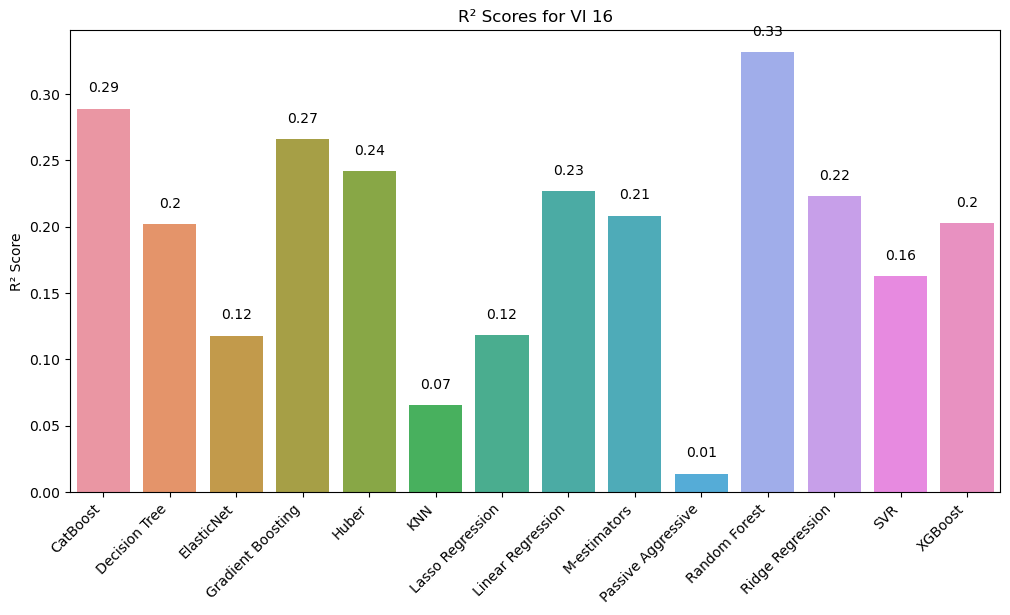


--------------------------------------------------

VI 17:
                         MAE        MSE      RMSE        R2
CatBoost            2.269312   9.530788  3.087197  0.068877
Decision Tree       2.644444  11.735556  3.425720 -0.146520
ElasticNet          3.046457  11.726817  3.424444 -0.145667
Gradient Boosting   2.378779  10.562915  3.250064 -0.031958
Huber               2.472939   7.645325  2.765018  0.253080
KNN                 2.697778   9.200978  3.033311  0.101099
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.511285   7.834004  2.798929  0.234647
M-estimators        2.412965   7.907095  2.811956  0.227506
Passive Aggressive  2.592223   8.674822  2.945305  0.152502
Random Forest       2.261778   7.181932  2.679913  0.298352
Ridge Regression    2.608765   8.397435  2.897833  0.179602
SVR                 2.614029   8.404469  2.899046  0.178914
XGBoost             2.638640  11.703623  3.421056 -0.143401


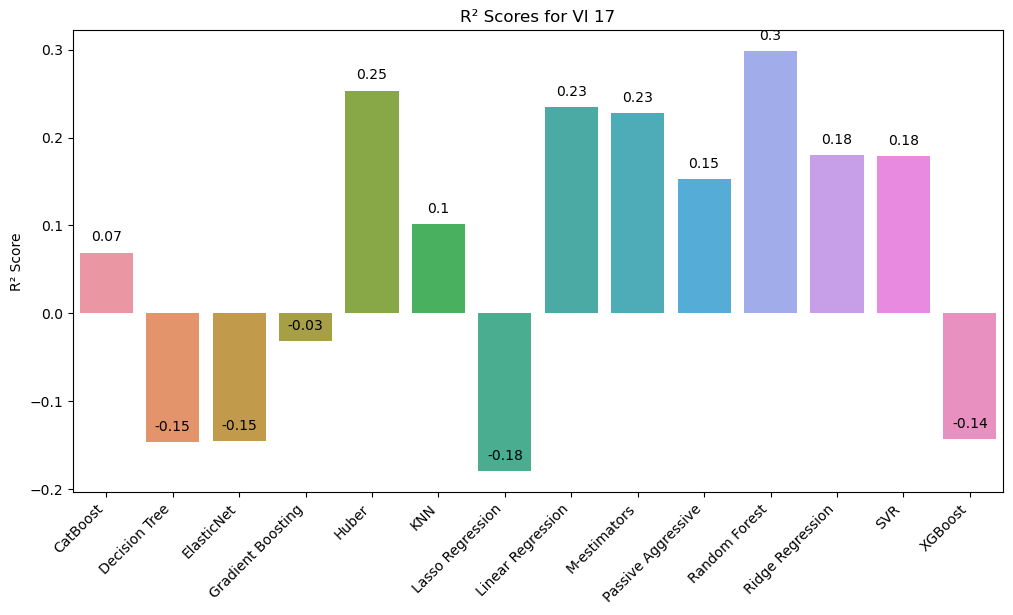


--------------------------------------------------

VI 18:
                         MAE        MSE      RMSE        R2
CatBoost            2.906439  10.822777  3.289799 -0.057345
Decision Tree       3.055556  12.485556  3.533491 -0.219793
ElasticNet          2.877641  10.502161  3.240704 -0.026022
Gradient Boosting   2.985054  11.473442  3.387247 -0.120913
Huber               2.484288   7.879132  2.806979  0.230238
KNN                 2.726667   9.458000  3.075386  0.075988
Lasso Regression    2.907968  10.708740  3.272421 -0.046204
Linear Regression   2.498072   7.952232  2.819970  0.223096
M-estimators        2.333486   7.568740  2.751134  0.260562
Passive Aggressive  2.439405   8.089428  2.844192  0.209693
Random Forest       2.828444  10.123579  3.181757  0.010964
Ridge Regression    2.529735   8.096404  2.845418  0.209011
SVR                 2.651872   8.751186  2.958240  0.145042
XGBoost             3.052872  12.464072  3.530449 -0.217694


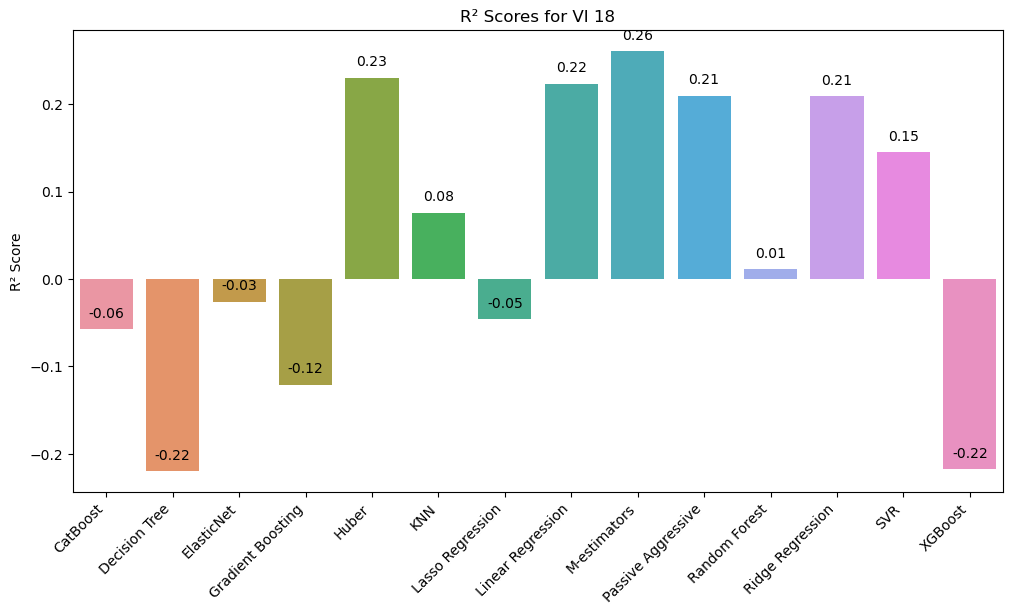


--------------------------------------------------

VI 19:
                         MAE        MSE      RMSE        R2
CatBoost            2.193425   6.111373  2.472119  0.402941
Decision Tree       2.255556   6.418889  2.533553  0.372898
ElasticNet          3.088889  12.073333  3.474670 -0.179520
Gradient Boosting   2.264155   6.468491  2.543323  0.368052
Huber               2.462322   7.618120  2.760094  0.255738
KNN                 2.646667   8.993556  2.998926  0.121363
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.497817   7.791936  2.791404  0.238757
M-estimators        2.992798  11.339234  3.367378 -0.107801
Passive Aggressive  3.092419  13.138204  3.624666 -0.283554
Random Forest       2.274222   6.054907  2.460672  0.408458
Ridge Regression    2.848707  10.252471  3.201948 -0.001628
SVR                 2.622659   8.444844  2.906001  0.174970
XGBoost             2.254469   6.412887  2.532368  0.373485


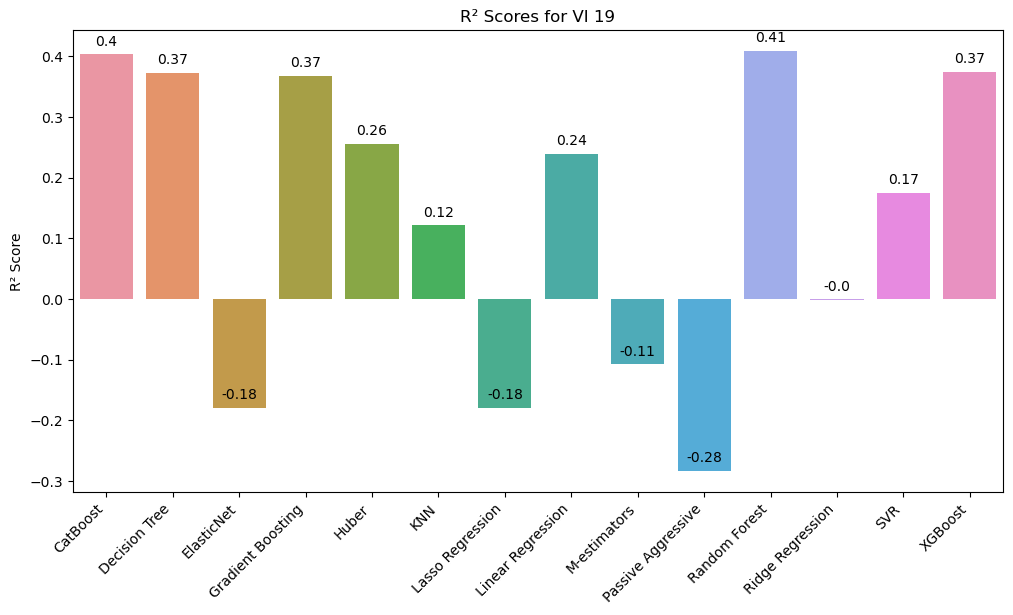


--------------------------------------------------

VI 20:
                         MAE        MSE      RMSE        R2
CatBoost            2.163377   7.675964  2.770553  0.250087
Decision Tree       2.266667   8.382222  2.895207  0.181088
ElasticNet          3.070143  11.919510  3.452464 -0.164492
Gradient Boosting   2.128982   7.600131  2.756834  0.257495
Huber               2.516471   8.027881  2.833351  0.215706
KNN                 2.686667   9.663956  3.108690  0.055867
Lasso Regression    3.088889  12.073333  3.474670 -0.179520
Linear Regression   2.512851   8.041927  2.835829  0.214333
M-estimators        2.346619   7.735139  2.781212  0.244306
Passive Aggressive  3.068160  12.512844  3.537350 -0.222459
Random Forest       2.272889   7.345139  2.710192  0.282407
Ridge Regression    2.628803   8.648159  2.940775  0.155107
SVR                 2.760704   9.387626  3.063923  0.082864
XGBoost             2.264583   8.367205  2.892612  0.182555


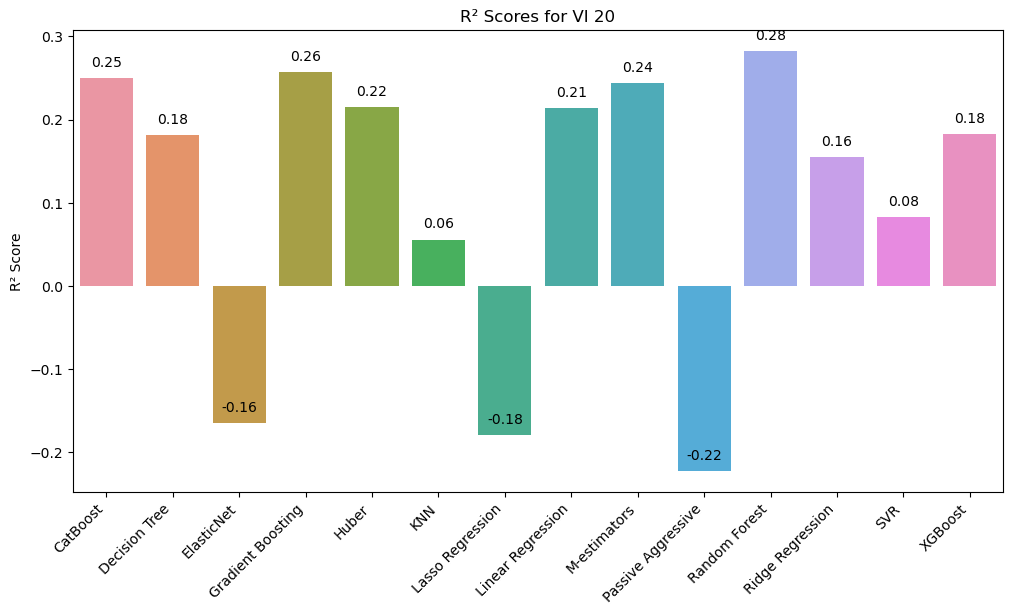


--------------------------------------------------

VI 21:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.144616   7.080247  2.660873  0.308286
Decision Tree       2.433333   8.983333  2.997221  0.122362
ElasticNet          2.313443   7.162957  2.676370  0.300206
Gradient Boosting   1.962277   6.999899  2.645732  0.316136
Huber               3.396203  14.530197  3.811850 -0.419546
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.351985   7.367495  2.714313  0.280223
Linear Regression   3.847356  19.994670  4.471540 -0.953405
M-estimators        3.106073  15.712189  3.963860 -0.535023
Passive Aggressive  2.754382   9.544797  3.089465  0.067509
Random Forest       1.872889   5.665161  2.380160  0.446535
Ridge Regression    3.147215  12.350555  3.514336 -0.206603
SVR                 3.068265  11.835508  3.440277 -0.156285
XGBoost             1.743415   3.843121  1.960388  0.624541


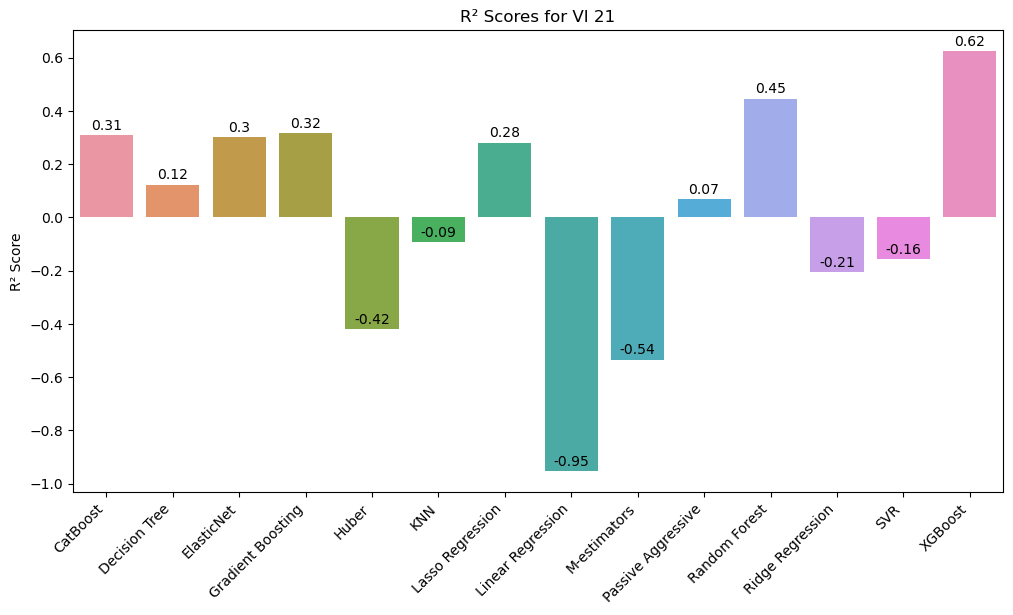


--------------------------------------------------

VI 22:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.008906   6.031918  2.455996  0.410704
Decision Tree       2.566667   9.578889  3.094978  0.064178
ElasticNet          3.025751  11.406108  3.377293 -0.114334
Gradient Boosting   1.797928   6.408669  2.531535  0.373897
Huber               4.235219  21.307300  4.615983 -1.081644
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.784702  19.295315  4.392643 -0.885081
M-estimators        3.485917  16.081260  4.010145 -0.571080
Passive Aggressive  2.808334   9.998870  3.162099  0.023147
Random Forest       1.729556   4.925128  2.219263  0.518833
Ridge Regression    3.186794  12.795537  3.577085 -0.250077
SVR                 3.070546  11.851721  3.442633 -0.157869
XGBoost             1.568573   3.052408  1.747114  0.701791


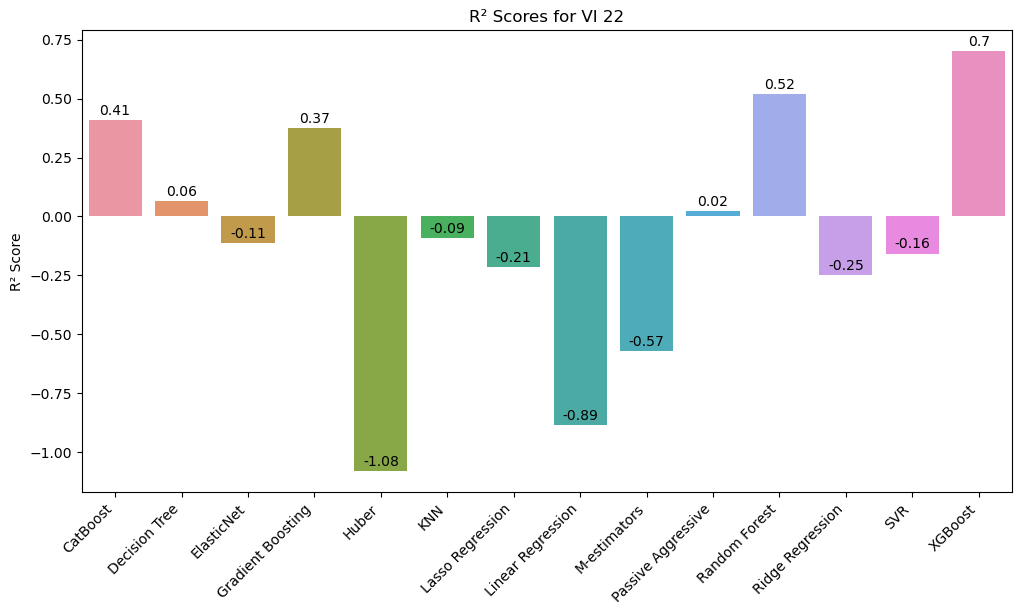


--------------------------------------------------

VI 23:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.149642   6.738630  2.595887  0.341661
Decision Tree       3.288889  18.140000  4.259108 -0.772211
ElasticNet          2.787817   9.746890  3.122001  0.047765
Gradient Boosting   2.029927   6.596102  2.568288  0.355585
Huber               3.555075  16.891022  4.109869 -0.650190
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.919589  10.567851  3.250823 -0.032440
Linear Regression   4.016911  21.855624  4.675000 -1.135214
M-estimators        4.251365  24.428930  4.942563 -1.386616
Passive Aggressive  2.797515   9.900807  3.146555  0.032728
Random Forest       1.977000   6.050621  2.459801  0.408877
Ridge Regression    3.281555  13.526197  3.677798 -0.321459
SVR                 3.070052  11.848260  3.442130 -0.157531
XGBoost             1.525060   4.200915  2.049613  0.589586


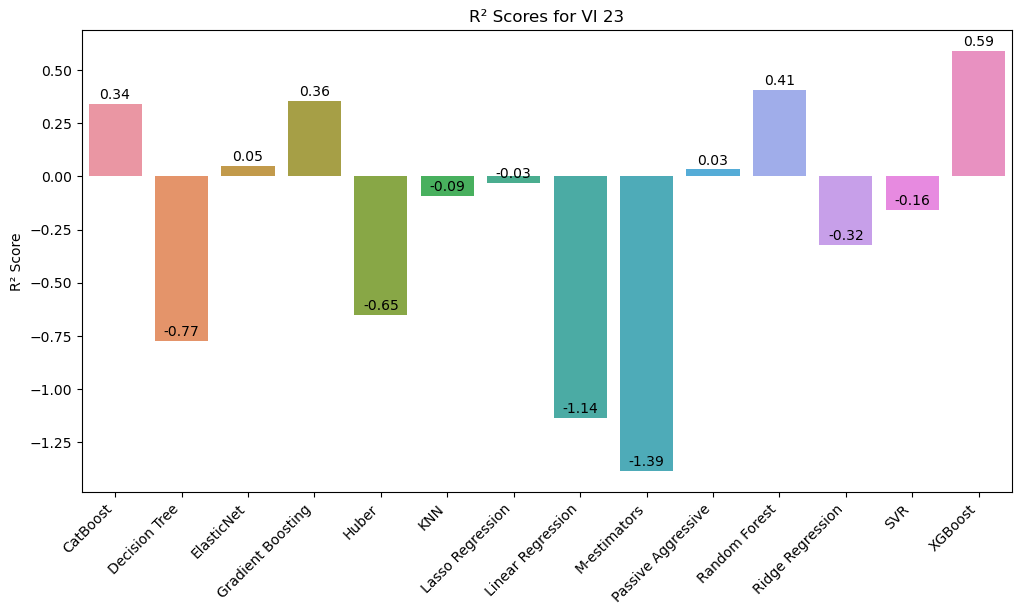


--------------------------------------------------

VI 24:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.079389   6.610746  2.571137  0.354155
Decision Tree       2.477778   9.247778  3.041016  0.096526
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.875646   6.426631  2.535080  0.372142
Huber               4.384550  22.151082  4.706494 -1.164079
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.831894  19.910277  4.462093 -0.945160
M-estimators        5.542538  53.460772  7.311687 -4.222920
Passive Aggressive  2.811764  10.027752  3.166663  0.020326
Random Forest       1.892111   5.711002  2.389770  0.442056
Ridge Regression    3.547762  15.152602  3.892634 -0.480353
SVR                 3.070947  11.854234  3.442998 -0.158115
XGBoost             1.993076   4.796881  2.190178  0.531362


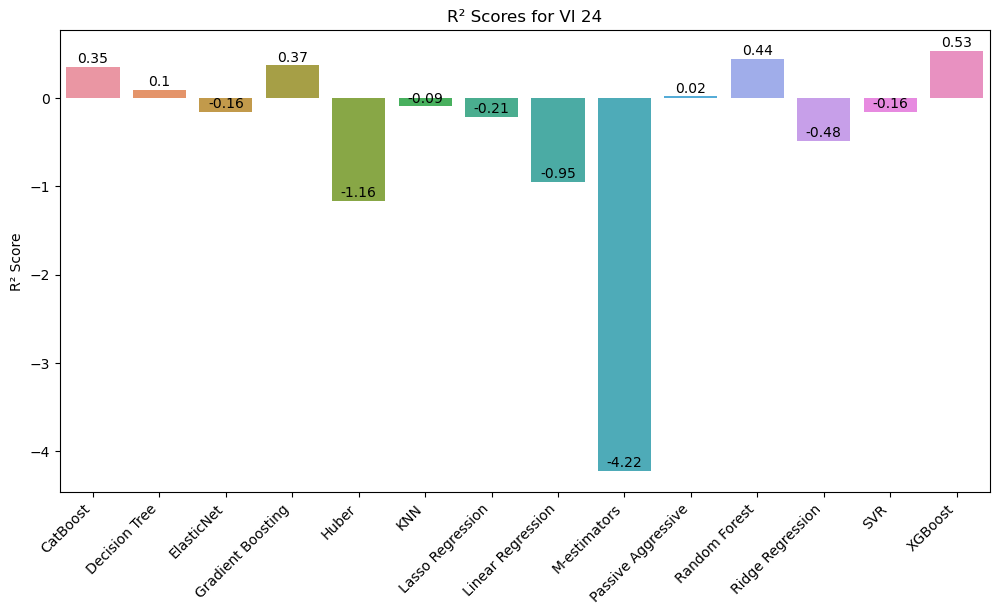


--------------------------------------------------

VI 25:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.142968   6.995920  2.644980  0.316525
Decision Tree       3.377778  18.080000  4.252058 -0.766349
ElasticNet          3.070322  11.748944  3.427673 -0.147828
Gradient Boosting   2.391092   8.665700  2.943756  0.153393
Huber               4.438287  23.822027  4.880781 -1.327324
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   4.047663  22.195244  4.711183 -1.168393
M-estimators        4.357265  25.233142  5.023260 -1.465185
Passive Aggressive  2.809031  10.001864  3.162572  0.022855
Random Forest       2.063222   6.534886  2.556342  0.361566
Ridge Regression    3.361089  14.291779  3.780447 -0.396254
SVR                 3.070566  11.851867  3.442654 -0.157884
XGBoost             1.509948   4.891764  2.211733  0.522093


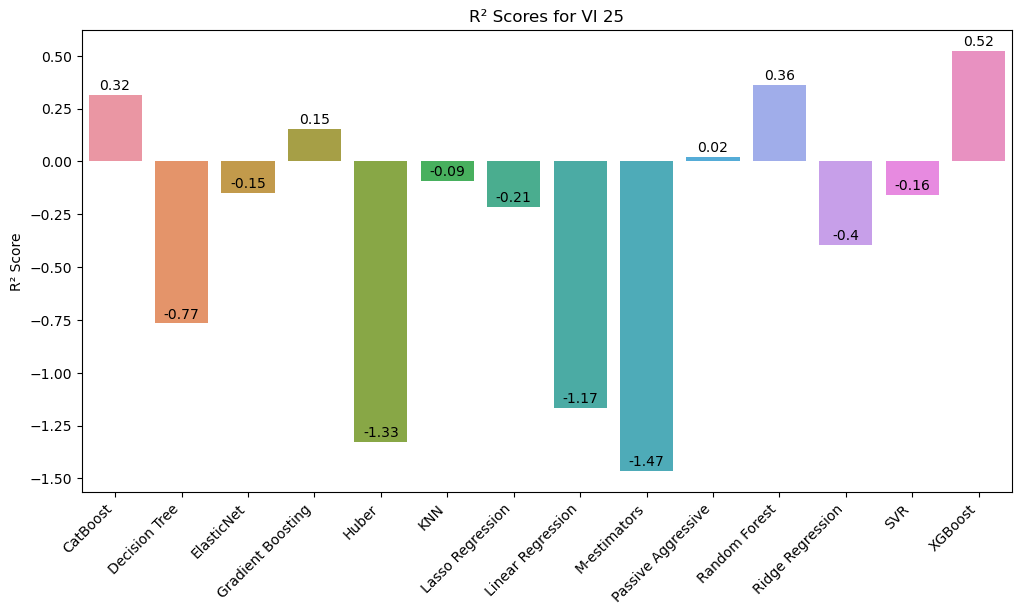


--------------------------------------------------

VI 26:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.560225   3.568052  1.888929  0.651415
Decision Tree       2.255556   8.494444  2.914523  0.170124
ElasticNet          2.526106   8.207154  2.864813  0.198191
Gradient Boosting   1.648735   4.607272  2.146456  0.549887
Huber               1.694989   5.141131  2.267406  0.497731
KNN                 3.160000  11.966222  3.459223 -0.169056
Lasso Regression    2.614986   8.700918  2.949732  0.149953
Linear Regression   1.904739   5.804516  2.409256  0.432920
M-estimators        3.365164  14.607903  3.822029 -0.427138
Passive Aggressive  3.300995  12.889526  3.590199 -0.259259
Random Forest       1.549444   4.197551  2.048793  0.589915
Ridge Regression    1.871848   5.567226  2.359497  0.456103
SVR                 3.199087  12.362782  3.516075 -0.207798
XGBoost             1.462407   2.856626  1.690156  0.720918


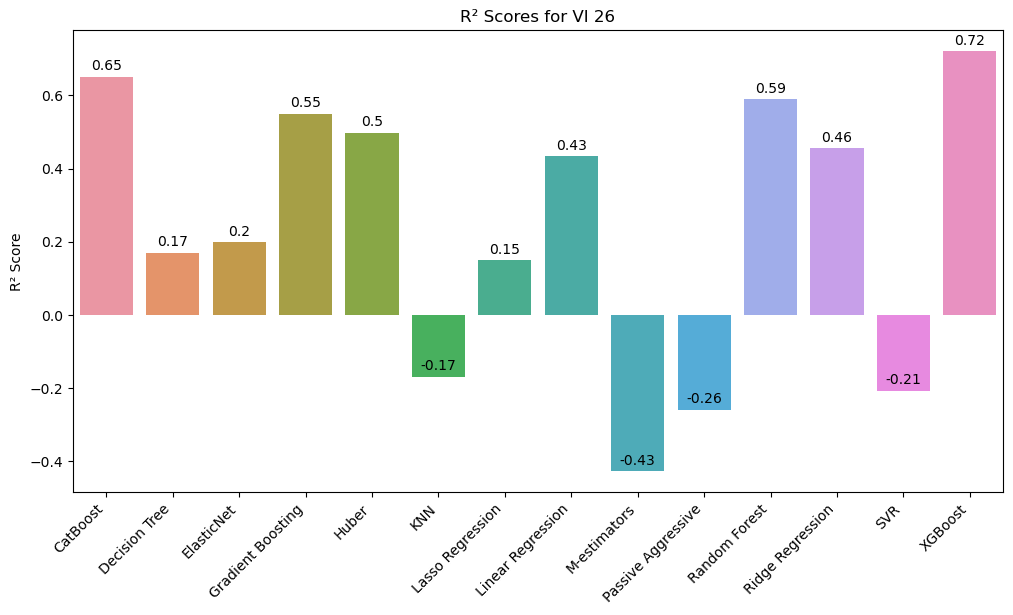


--------------------------------------------------

VI 27:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.456049   2.974496  1.724673  0.709403
Decision Tree       1.966667   6.912222  2.629111  0.324701
ElasticNet          3.188586  12.620884  3.552588 -0.233014
Gradient Boosting   1.293258   3.120317  1.766442  0.695157
Huber               1.640300   4.910485  2.215961  0.520264
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.878965   5.605133  2.367516  0.452399
M-estimators        3.049258  12.100498  3.478577 -0.182174
Passive Aggressive  3.614573  16.376772  4.046822 -0.599950
Random Forest       1.508889   3.925074  1.981180  0.616535
Ridge Regression    2.098621   6.225842  2.495164  0.391758
SVR                 3.206173  12.458930  3.529721 -0.217191
XGBoost             1.000599   1.581558  1.257600  0.845488


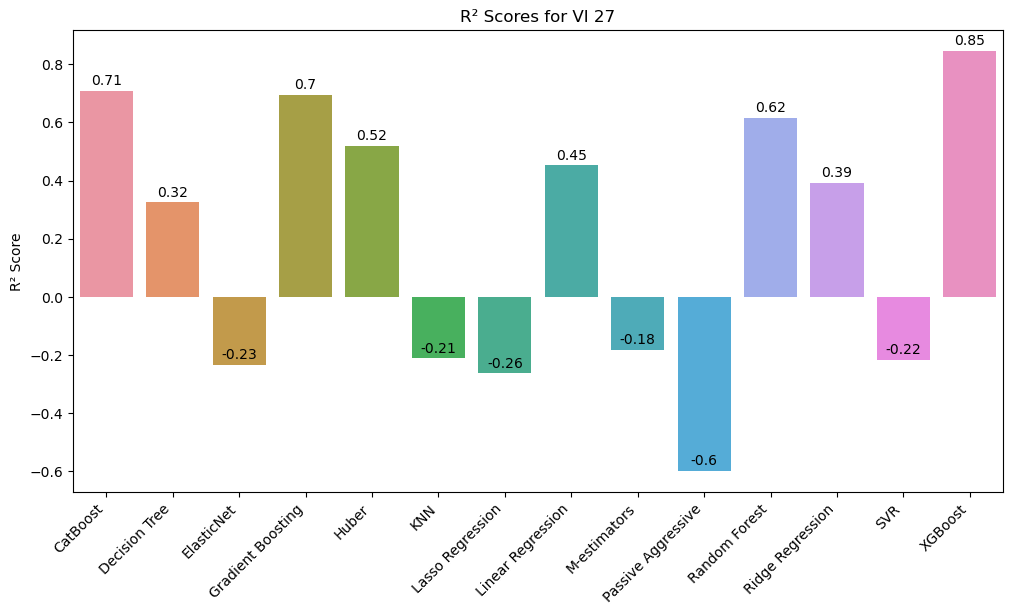


--------------------------------------------------

VI 28:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.750959   4.208235  2.051398  0.588871
Decision Tree       1.777778   6.435556  2.536840  0.371270
ElasticNet          2.964960  10.940564  3.307652 -0.068853
Gradient Boosting   1.460329   3.757086  1.938320  0.632947
Huber               1.776371   5.434183  2.331134  0.469100
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.035170  11.437551  3.381945 -0.117406
Linear Regression   1.960752   6.186628  2.487293  0.395589
M-estimators        4.380679  26.357042  5.133911 -1.574985
Passive Aggressive  3.538578  15.410032  3.925561 -0.505503
Random Forest       1.558000   4.319746  2.078400  0.577977
Ridge Regression    1.989210   6.073707  2.464489  0.406621
SVR                 3.205415  12.442178  3.527347 -0.215555
XGBoost             1.232332   2.229999  1.493318  0.782137


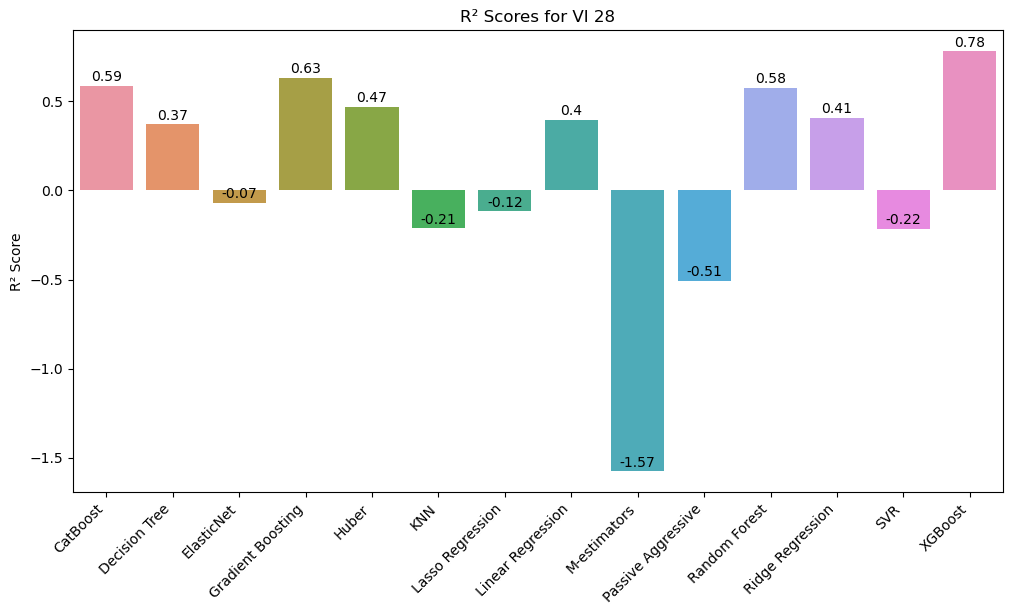


--------------------------------------------------

VI 29:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.568324   3.405732  1.845463  0.667273
Decision Tree       2.166667   8.130000  2.851315  0.205729
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.620679   4.450427  2.109603  0.565210
Huber               1.957361   5.640817  2.375040  0.448913
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.886641   5.700531  2.387578  0.443079
M-estimators        3.222278  13.575233  3.684458 -0.326250
Passive Aggressive  3.637854  16.651906  4.080675 -0.626830
Random Forest       1.565000   4.353179  2.086427  0.574711
Ridge Regression    2.710274   9.214642  3.035563  0.099764
SVR                 3.206135  12.462511  3.530228 -0.217541
XGBoost             1.325536   2.388716  1.545547  0.766631


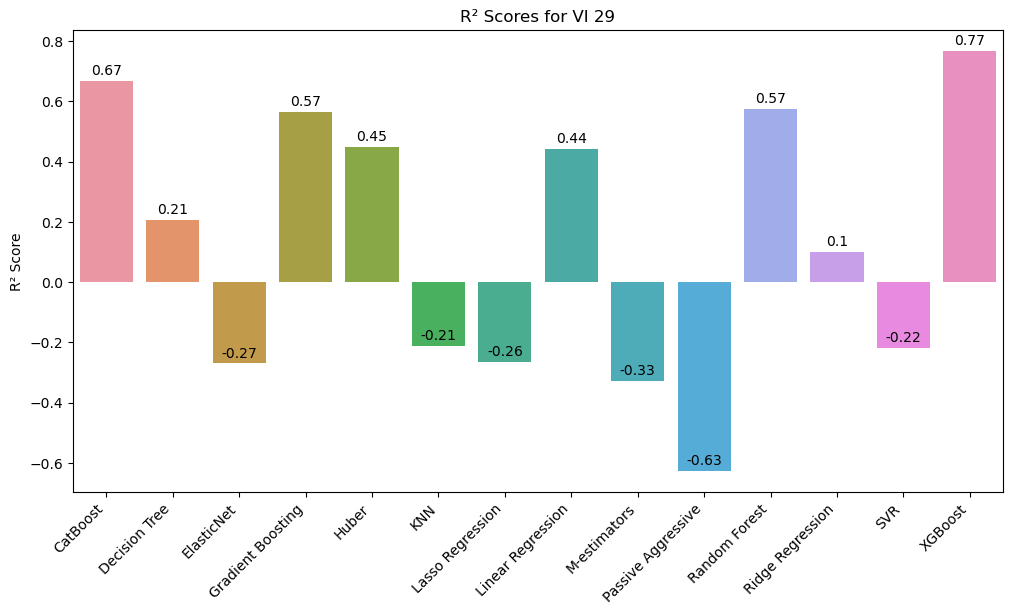


--------------------------------------------------

VI 30:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.660477   4.534477  2.129431  0.556998
Decision Tree       1.377778   2.257778  1.502590  0.779423
ElasticNet          3.224486  12.910854  3.593168 -0.261343
Gradient Boosting   1.537894   4.366549  2.089629  0.573404
Huber               1.934437   5.744405  2.396749  0.438793
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.004356   6.383094  2.526479  0.376395
M-estimators        5.194393  36.844138  6.069937 -2.599536
Passive Aggressive  3.617433  16.376082  4.046737 -0.599883
Random Forest       1.597667   4.845673  2.201289  0.526596
Ridge Regression    2.249617   7.019516  2.649437  0.314219
SVR                 3.206484  12.460991  3.530013 -0.217393
XGBoost             1.369652   2.989806  1.729106  0.707907


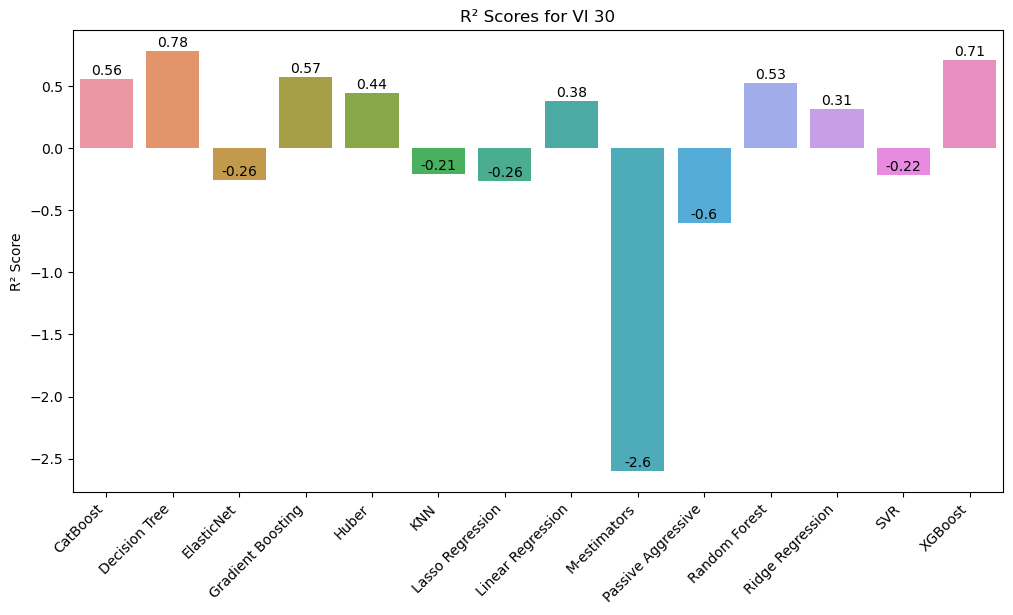


--------------------------------------------------



In [10]:
# C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv"
df = pd.read_csv(file_path)

# Data Preprocessing: Dropping unnecessary columns and handling missing values
columns_to_drop = ['id', 'Plot_Name']
df = df.drop(columns=columns_to_drop)
df = df.dropna()  # Handle missing values

# Models Definition 
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))

]

# Scenario 2: Using each VI based on CD with all environmental data #, 'Maize_high(m)' , 'CHM_mean'
scenarios = [
#SCN1_CD_5VI 
    #['Cigr_CD', 'Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD'],
    ['Cigr_CD'],
    ['Cire_CD'],
    ['EVI2_CD'],
    ['NDRE_CD'],
    ['NDVI_CD'],

#SCN2_CD_16Env   
    ['Cigr_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['Cire_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['EVI2_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['NDRE_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['NDVI_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
#SCN3_CD_6FE 
    ['Cigr_CD', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['Cire_CD', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['EVI2_CD', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['NDRE_CD', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['NDVI_CD', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
#SCN4_CV_5VI 
    #['Cigr_CV', 'Cire_CV', 'EVI2_CV', 'NDRE_CV', 'NDVI_CV'],
    ['Cigr_CV'],
    ['Cire_CV'],
    ['EVI2_CV'],
    ['NDRE_CV'],
    ['NDVI_CV'],
#SCN5_CV_16Env   
    ['Cigr_CV', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['EVI2_CV', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['NDRE_CV', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
    ['NDVI_CV', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature', 'Maize_high'],
#SCN6_CV_6FE 
    ['Cigr_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['Cire_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['EVI2_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['NDRE_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['NDVI_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']
]

# Loop through scenarios and evaluate the models
for i, scenario in enumerate(scenarios):
    print(f"Scenario {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    print(results_scenario_df.T)
    print("\n" + "-"*50 + "\n")



# Loop through scenarios and evaluate the models
for i, scenario in enumerate(scenarios):
    print(f"VI {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    
    # Save to CSV
    results_scenario_df.T.to_csv(f"C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/4Oct_Predict_With_ensemble/14ML_30SCN_{i+1}.csv")

    # Print results
    print(results_scenario_df.T)
    
    # # Visualize the results (R² scores)
    # plt.figure(figsize=(12, 6))
    # sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    # plt.title(f"R² Scores for Scenario {i+1}")
    # plt.xticks(rotation=45, ha='right')
    # plt.ylabel('R² Score')
    # plt.show()

    # print("\n" + "-"*50 + "\n")



    # Visualize the results (R² scores) and Antonate value
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    plt.title(f"R² Scores for VI {i+1}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score')

    # Adding annotations for R2 values
    for idx, value in enumerate(results_scenario_df.loc['R2']):
        plt.text(idx, value + 0.01, round(value, 2), ha='center', va='bottom')

    plt.show()

    print("\n" + "-"*50 + "\n")


import matplotlib.pyplot as plt
def plot_model_performance(results, title):
    results_sorted = results.sort_values(by='R2', ascending=False)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(results_sorted.index, results_sorted['R2'])
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=45, ha='right')

    # Adding annotations for R2 values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.show()

    plot_model_performance(results_scenario_1, "All SCN")





In [ ]:
# Importing the necessary library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Defining the file path for the new CSV file
file_path_new = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv"

# Loading the new CSV file
data_new = pd.read_csv(file_path_new)

# Displaying the first few rows of the new dataset
data_new.head()



# Dropping the "id" and "Plot_Name" columns
data_new = data_new.drop(columns=['id', 'Plot_Name'])

# Displaying the first few rows after dropping the unnecessary columns
data_new.head()


# Calculating the correlation with the "Seed" column
correlation_with_seed = data_new.corr()['Seed'].drop('Seed')

# Plotting the correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_seed.values, y=correlation_with_seed.index, palette="viridis")
plt.title('Correlation with Seed (Grain Yield)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Returning the features that have a high correlation (absolute value greater than 0.5) with "Seed"
high_correlation_features = correlation_with_seed[correlation_with_seed.abs() > 0.5]
high_correlation_features

Certainly! Let's break down the ensemble methods demonstrated in the script:

1. **Simple Voting Ensemble**:
    The simple voting ensemble is a straightforward averaging method. For regression tasks, it calculates the mean prediction from all models for each instance (or row) in the dataset. Mathematically, for \( n \) models:

    \[
    \text{{Simple Voting Prediction}}(i) = \frac{1}{n} \sum_{j=1}^{n} \text{{Prediction}}_{j}(i)
    \]

    where \( \text{{Prediction}}_{j}(i) \) is the prediction of the \( j^{th} \) model for the \( i^{th} \) instance.

2. **Weighted Voting Ensemble**:
    Instead of giving each model's prediction equal importance (as in simple voting), weighted voting assigns a specific weight to each model's prediction. The weights can be based on model performance, domain knowledge, or any other criteria. In the provided script, I've used equal weights for simplicity. The formula for the weighted voting ensemble is:

    \[
    \text{{Weighted Voting Prediction}}(i) = \sum_{j=1}^{n} w_j \times \text{{Prediction}}_{j}(i)
    \]

    where \( w_j \) is the weight of the \( j^{th} \) model. In the script, since we used equal weights, \( w_j = \frac{1}{n} \) for all \( j \).

3. **Actual Values (`Seed` column)**:
    The `Seed` column in the merged dataset represents the true target values for each instance. These values are not derived from any ensemble method but are the actual recorded values from your original dataset. They are used as a ground truth to evaluate the performance of the ensemble predictions.

In essence:
- The `simple_voting` column provides predictions based on the average of all models.
- The `weighted_voting` column provides predictions based on a weighted average of all models.
- The `Seed` column provides the true target values to which these predictions can be compared.